# ECS784 CW 1
# Supervised Learning - Detecting Malicious Websites

### Version History

 * v1 28/02/2023: imported dataset, conducted data analysis and pre-processing 
 * v1.1 08/03/2023: conducted literature review, visualization of feature relations and feature engineering
 * v1.2 10/03/2023: trained and tested with 2 learning methods - Logistic regression and KNN algorithm, implemented PCA to analyze feature reductions. Added coding comments
  


## 1. The Data Analysis Problem
   
* Malicious and Benign Websites Data Set from Kaggle: https://www.kaggle.com/datasets/xwolf12/malicious-and-benign-websites
* The objective of this project is to use supervised learning to predict if a website is malicious or safe based on each URL's available network data.


### Data Description
   
Variable | Description
----------|--------------
URL | Anonymous identification of the URL
URL_LENGTH | Number of characters in the URL
NUMBER_SPECIAL_CHARACTERS | number of special characters present in the URL
CHARSET | character encoding standard used
SERVER | Operating System (OS) of the server
CONTENT_LENGTH | HTTP Header Content Size
WHOIS_COUNTRY | Server's response location - country
WHOIS_STATEPRO | Server's response location - state
WHOIS_REGDATE | Server registration date (DD/MM/YYY HH:MM)
WHOIS_UPDATED_DATE | Server's latest update date (DD/MM/YYY HH:MM)
TCP_CONVERSATION_EXCHANGE | number of TCP packets exchanged between server and client
DIST_REMOTE_TCP_PORT | Number of ports detected that are different from the TCP
REMOTE_IPS | total number of IP addresses connected to the client
APP_BYTES | number of transferred bytes from the server to the client
SOURCE_APP_PACKETS | number of packets sent from the client
REMOTE_APP_PACKETS | number of packets recieved from the server
APP_PACKETS | Total number of IP packets during the client-server communication 
DNS_QUERY_TIMES | number of DNS packets created during the client-server communication 
TYPE | web page type (1 - malicious, 0 - benign)


## 2. Exploring the Data Using Pandas

### 2.1 Necessary modules and reading of the data

In [1]:
import pandas as pd
import numpy as np
# library used for data visualization
import seaborn as sns             
from matplotlib import pyplot as plt 
import warnings
warnings.simplefilter('ignore', category=UserWarning)  # suppresses warning message from Seaborn

%matplotlib inline

In [2]:
df = pd.read_csv('Malicious_url_prediction.csv') #loads the dataset into DataFrame

### 2.2 Exploring size of data and variable types

* Using pandas library, we can explore the types of data we are training for in order to gain more understanding of feature relations.

In [3]:
df.columns # lists the dataframe columns

Index(['URL', 'URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS', 'CHARSET', 'SERVER',
       'CONTENT_LENGTH', 'WHOIS_COUNTRY', 'WHOIS_STATEPRO', 'WHOIS_REGDATE',
       'WHOIS_UPDATED_DATE', 'TCP_CONVERSATION_EXCHANGE',
       'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'APP_BYTES', 'SOURCE_APP_PACKETS',
       'REMOTE_APP_PACKETS', 'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES',
       'APP_PACKETS', 'DNS_QUERY_TIMES', 'Type'],
      dtype='object')

In [4]:
df.dtypes # returns the datatype of each column 

URL                           object
URL_LENGTH                     int64
NUMBER_SPECIAL_CHARACTERS      int64
CHARSET                       object
SERVER                        object
CONTENT_LENGTH               float64
WHOIS_COUNTRY                 object
WHOIS_STATEPRO                object
WHOIS_REGDATE                 object
WHOIS_UPDATED_DATE            object
TCP_CONVERSATION_EXCHANGE      int64
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_PACKETS             int64
REMOTE_APP_PACKETS             int64
SOURCE_APP_BYTES               int64
REMOTE_APP_BYTES               int64
APP_PACKETS                    int64
DNS_QUERY_TIMES              float64
Type                           int64
dtype: object

In [5]:
df.shape #returns total number of columns and rows from the dataset

(1781, 21)

### 2.3 Preliminary exploration of values in the data

* Here in this section, the columns are explored and with the data types of each column, the variables are divided into numerical and categorical variables.

In [6]:
df.head() # Displays the first few rows of the dataFrame

URL  URL_LENGTH  NUMBER_SPECIAL_CHARACTERS     CHARSET  \
0   M0_109          16                          7  iso-8859-1   
1  B0_2314          16                          6       UTF-8   
2   B0_911          16                          6    us-ascii   
3   B0_113          17                          6  ISO-8859-1   
4   B0_403          17                          6       UTF-8   

                  SERVER  CONTENT_LENGTH WHOIS_COUNTRY WHOIS_STATEPRO  \
0                  nginx           263.0          None           None   
1          Apache/2.4.10         15087.0          None           None   
2  Microsoft-HTTPAPI/2.0           324.0          None           None   
3                  nginx           162.0            US             AK   
4                   None        124140.0            US             TX   

      WHOIS_REGDATE WHOIS_UPDATED_DATE  ...  DIST_REMOTE_TCP_PORT  REMOTE_IPS  \
0  10/10/2015 18:21               None  ...                     0           2   
1              None               None  ...                     7           4   
2              None               None  ...                     0           0   
3  07/10/1997 04:00   12/09/2013 00:45  ...                    22           3   
4  12/05/1996 00:00   11/04/2017 00:00  ...                     2           5   

   APP_BYTES  SOURCE_APP_PACKETS  REMOTE_APP_PACKETS  SOURCE_APP_BYTES  \
0        700                   9                  10              1153   
1       1230                  17                  19              1265   
2          0                   0                   0                 0   
3       3812                  39                  37             18784   
4       4278                  61                  62            129889   

   REMOTE_APP_BYTES  APP_PACKETS  DNS_QUERY_TIMES  Type  
0               832            9              2.0     1  
1              1230           17              0.0     0  
2                 0            0              0.0     0  
3              4380           39              8.0     0  
4              4586           61              4.0     0  

[5 rows x 21 columns]

In [7]:
df.describe().apply(lambda s: s.apply('{0:.5f}'.format)) 
#displays the numerical variables, lambda is used in order to format the numbers as real integers

URL_LENGTH NUMBER_SPECIAL_CHARACTERS CONTENT_LENGTH  \
count  1781.00000                1781.00000      969.00000   
mean     56.96126                  11.11173    11726.92776   
std      27.55559                   4.54990    36391.80905   
min      16.00000                   5.00000        0.00000   
25%      39.00000                   8.00000      324.00000   
50%      49.00000                  10.00000     1853.00000   
75%      68.00000                  13.00000    11323.00000   
max     249.00000                  43.00000   649263.00000   

      TCP_CONVERSATION_EXCHANGE DIST_REMOTE_TCP_PORT  REMOTE_IPS  \
count                1781.00000           1781.00000  1781.00000   
mean                   16.26109              5.47277     3.06064   
std                    40.50098             21.80733     3.38698   
min                     0.00000              0.00000     0.00000   
25%                     0.00000              0.00000     0.00000   
50%                     7.00000              0.00000     2.00000   
75%                    22.00000              5.00000     5.00000   
max                  1194.00000            708.00000    17.00000   

           APP_BYTES SOURCE_APP_PACKETS REMOTE_APP_PACKETS SOURCE_APP_BYTES  \
count     1781.00000         1781.00000         1781.00000       1781.00000   
mean      2982.33914           18.54015           18.74621      15892.54576   
std      56050.57475           41.62717           46.39797      69861.92989   
min          0.00000            0.00000            0.00000          0.00000   
25%          0.00000            0.00000            0.00000          0.00000   
50%        672.00000            8.00000            9.00000        579.00000   
75%       2328.00000           26.00000           25.00000       9806.00000   
max    2362906.00000         1198.00000         1284.00000    2060012.00000   

      REMOTE_APP_BYTES APP_PACKETS DNS_QUERY_TIMES        Type  
count       1781.00000  1781.00000      1780.00000  1781.00000  
mean        3155.59854    18.54015         2.26348     0.12128  
std        56053.78025    41.62717         2.93085     0.32654  
min            0.00000     0.00000         0.00000     0.00000  
25%            0.00000     0.00000         0.00000     0.00000  
50%          735.00000     8.00000         0.00000     0.00000  
75%         2701.00000    26.00000         4.00000     0.00000  
max      2362906.00000  1198.00000        20.00000     1.00000

* Analysation from the above cell:
    * lowest count -> content_length
    * below 25% -> from TCP_CONVERSATION_EXCHANGE to Type
    * categorical values -> charset, server, whois_country, whois_statepro, type -> type is shown as a numerical value in df.describe()
    * WHOIS_REGDATE, WHOIS_UPDATED_DATE are missing, as these are considered as categorical values here

In [8]:
df.info() # This pandas function returns the data types associated with each variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL                        1781 non-null   object 
 1   URL_LENGTH                 1781 non-null   int64  
 2   NUMBER_SPECIAL_CHARACTERS  1781 non-null   int64  
 3   CHARSET                    1781 non-null   object 
 4   SERVER                     1780 non-null   object 
 5   CONTENT_LENGTH             969 non-null    float64
 6   WHOIS_COUNTRY              1781 non-null   object 
 7   WHOIS_STATEPRO             1781 non-null   object 
 8   WHOIS_REGDATE              1781 non-null   object 
 9   WHOIS_UPDATED_DATE         1781 non-null   object 
 10  TCP_CONVERSATION_EXCHANGE  1781 non-null   int64  
 11  DIST_REMOTE_TCP_PORT       1781 non-null   int64  
 12  REMOTE_IPS                 1781 non-null   int64  
 13  APP_BYTES                  1781 non-null   int64

In [9]:
print('Type was dtype: {}'.format(df['Type'].dtype))
df = df.astype({'Type': str})  # treat TYPE as a categorical variable
print('Type is now dtype: {}'.format(df['Type'].dtype))

Type was dtype: int64
Type is now dtype: object


In [10]:
a = df.describe().apply(lambda s: s.apply('{0:.5f}'.format)) 

In [11]:
print('The row index is {}'.format(df.index))  # an index into the rows - initialised to row numbers
print('Can use iloc to access individual rows:\n{}'.format(df.iloc[[0, -1]]))  # access first and last row

The row index is RangeIndex(start=0, stop=1781, step=1)
Can use iloc to access individual rows:
         URL  URL_LENGTH  NUMBER_SPECIAL_CHARACTERS     CHARSET  \
0     M0_109          16                          7  iso-8859-1   
1780  B0_676         249                         40       utf-8   

                 SERVER  CONTENT_LENGTH WHOIS_COUNTRY WHOIS_STATEPRO  \
0                 nginx           263.0          None           None   
1780  Microsoft-IIS/8.5         24435.0            US      Wisconsin   

         WHOIS_REGDATE WHOIS_UPDATED_DATE  ...  DIST_REMOTE_TCP_PORT  \
0     10/10/2015 18:21               None  ...                     0   
1780  14/11/2008 00:00   20/11/2013 00:00  ...                     6   

      REMOTE_IPS  APP_BYTES  SOURCE_APP_PACKETS  REMOTE_APP_PACKETS  \
0              2        700                   9                  10   
1780          11       2314                  25                  28   

      SOURCE_APP_BYTES  REMOTE_APP_BYTES  APP_PACKETS 

### 2.4 Distributions of categorical values

In [12]:
print('URL is non-numeric and is unique for each row: {} different values, so we can drop it'
      .format(len(df['URL'].unique())))
df = df.drop(['URL'], axis=1)

URL is non-numeric and is unique for each row: 1781 different values, so we can drop it


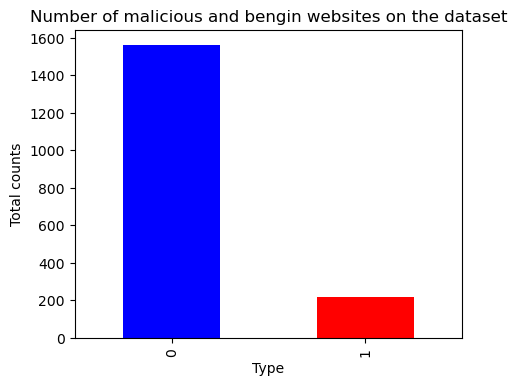

Values and counts for Type are:
0    1565
1     216
Name: Type, dtype: int64
Values and normalised counts for Type are:
0    0.87872
1    0.12128
Name: Type, dtype: float64


In [13]:
# To have a more visualization of our target variable we plot its total counts
df['Type'].value_counts().plot.bar(figsize=(5, 4), ylabel='Total counts', color=['blue', 'red'])
plt.title("Number of malicious and bengin websites on the dataset")
plt.xlabel('Type')
plt.show()

print('Values and counts for Type are:\n{}'.format(df['Type'].value_counts()))
print('Values and normalised counts for Type are:\n{}'.format(df['Type'].value_counts(normalize=True)))

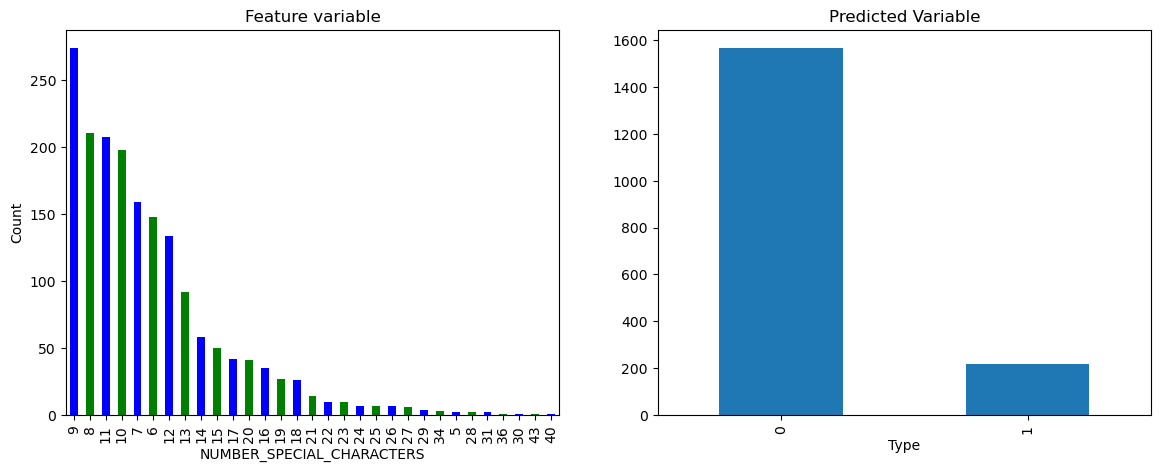

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

df['NUMBER_SPECIAL_CHARACTERS'].value_counts().plot(ax=axes[0], kind='bar',
                                title='Feature variable', color=['b', 'g'],
                                ylabel = 'Count', xlabel='NUMBER_SPECIAL_CHARACTERS')
df['Type'].value_counts().plot(ax=axes[1], kind='bar',
                                      title='Predicted Variable', xlabel='Type') 
plt.show()

<AxesSubplot:title={'center':'Feature variable'}, xlabel='WHOIS_COUNTRY', ylabel='Count'>

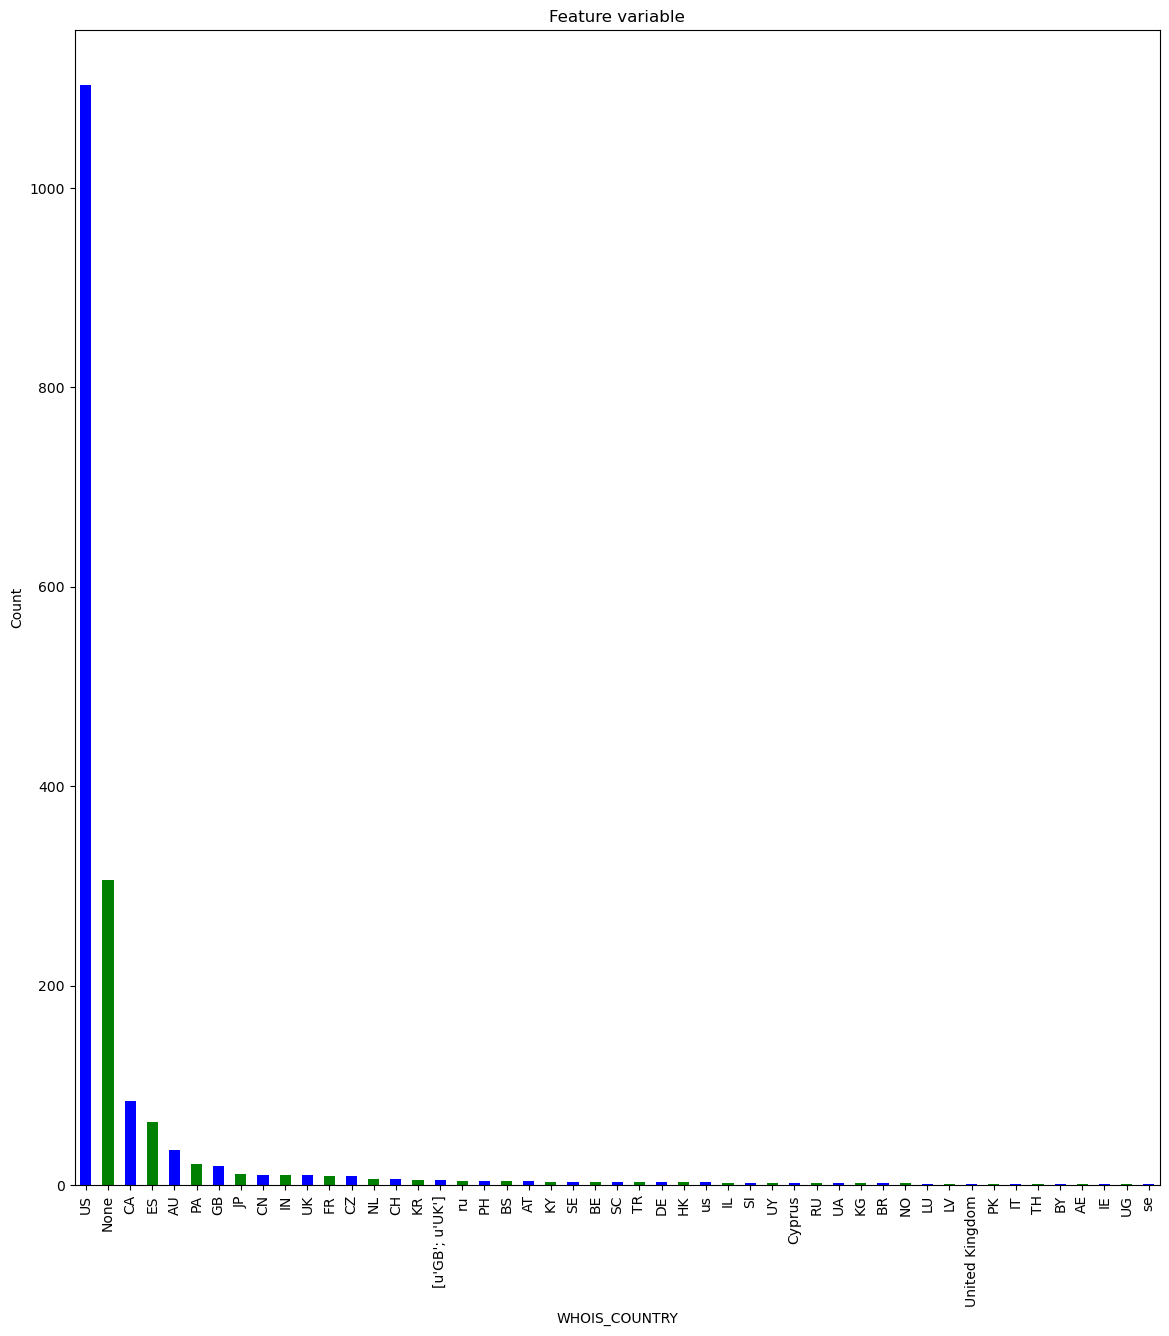

In [15]:
# From analyzing the dataset, we can see that the countries could be a vital feature, hence we plot it
fig, axes = plt.subplots(figsize=(14, 15))
df['WHOIS_COUNTRY'].value_counts().plot(kind='bar',
                                title='Feature variable', color=['b', 'g'],
                                ylabel = 'Count', xlabel='WHOIS_COUNTRY')

### 2.5 Distributions of numerical variables

* the ***Series*.plot()** is used to see the distribution of the numerical dataset

In [16]:
# numeric variables 
numerical_category = df[["URL_LENGTH", "NUMBER_SPECIAL_CHARACTERS",
                               "CONTENT_LENGTH","TCP_CONVERSATION_EXCHANGE",
                               "DIST_REMOTE_TCP_PORT", "REMOTE_IPS",
                               "APP_BYTES","SOURCE_APP_PACKETS",
                               "REMOTE_APP_PACKETS","SOURCE_APP_BYTES",
                               "REMOTE_APP_BYTES","APP_PACKETS","DNS_QUERY_TIMES"]]

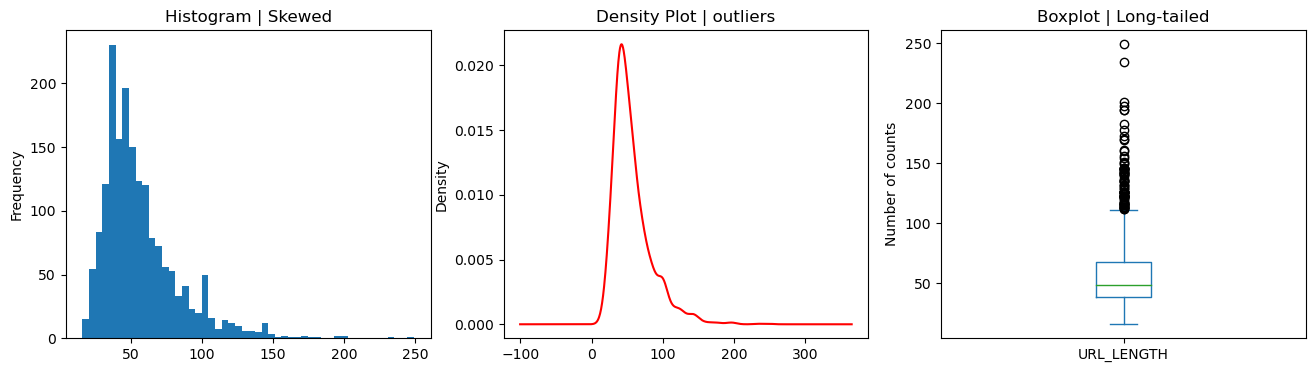

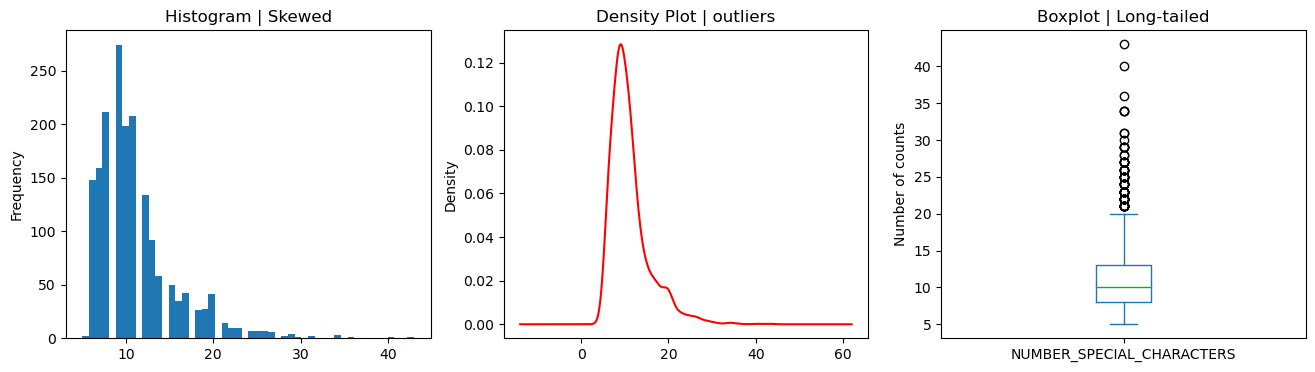

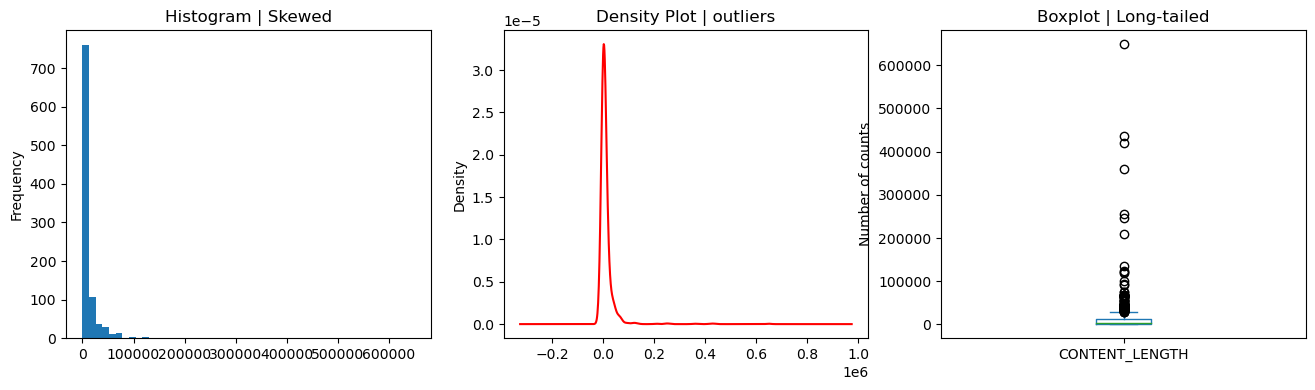

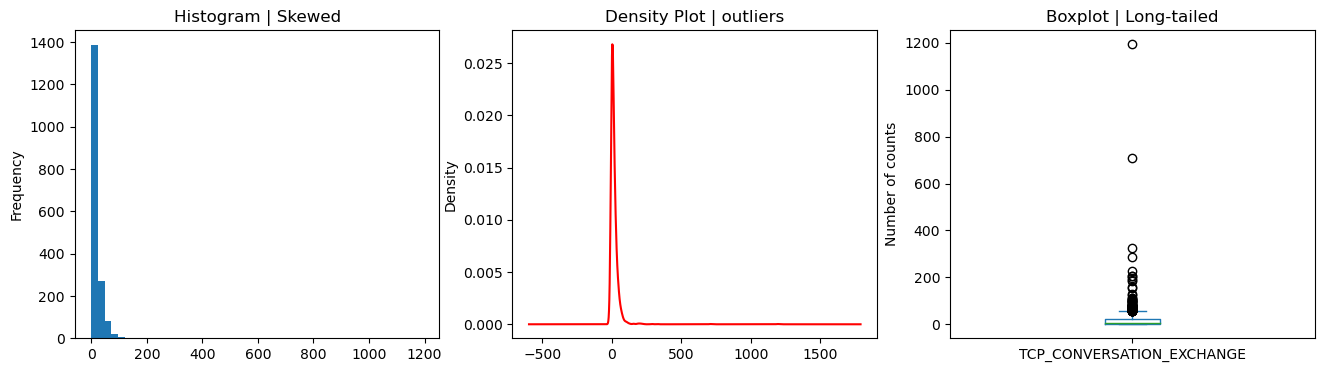

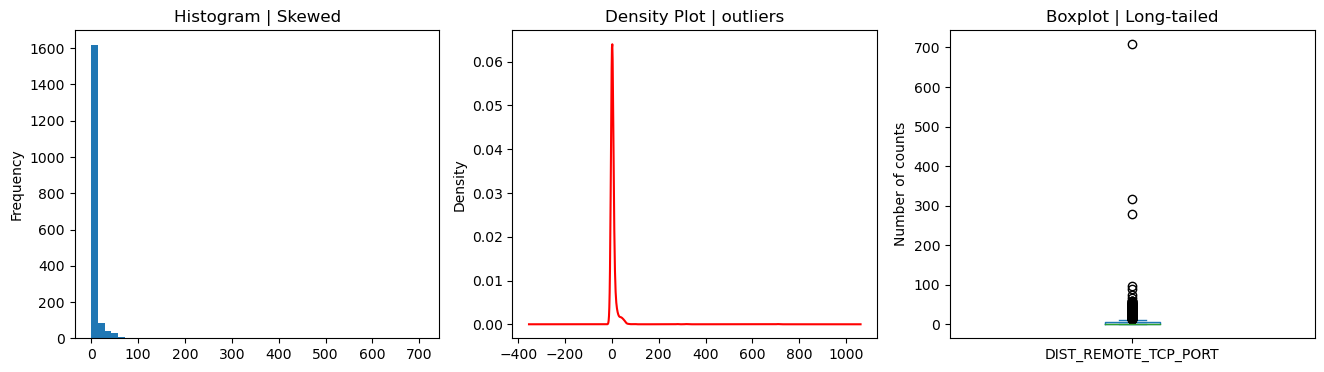

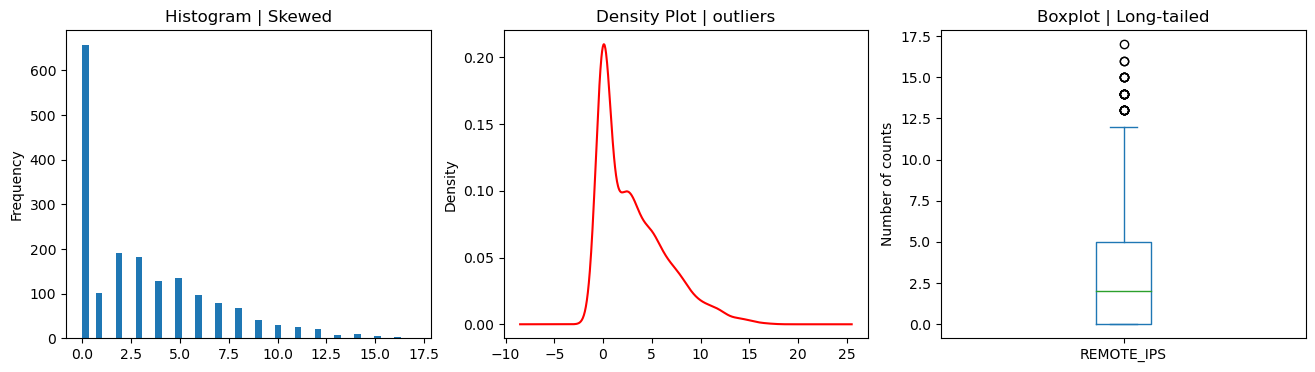

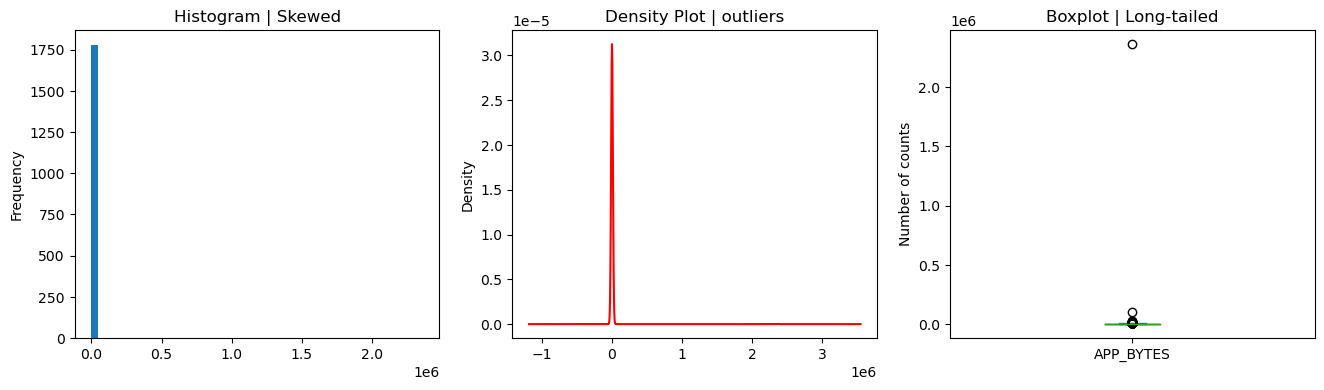

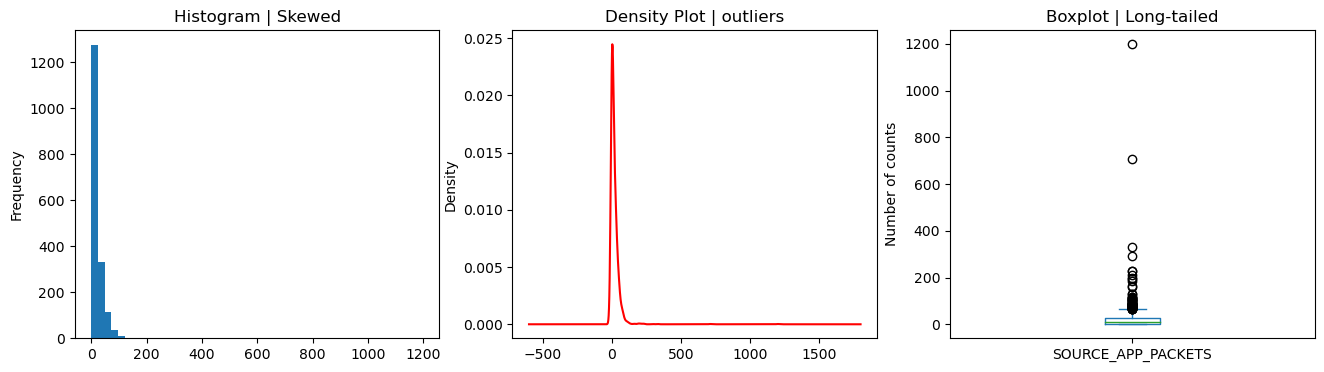

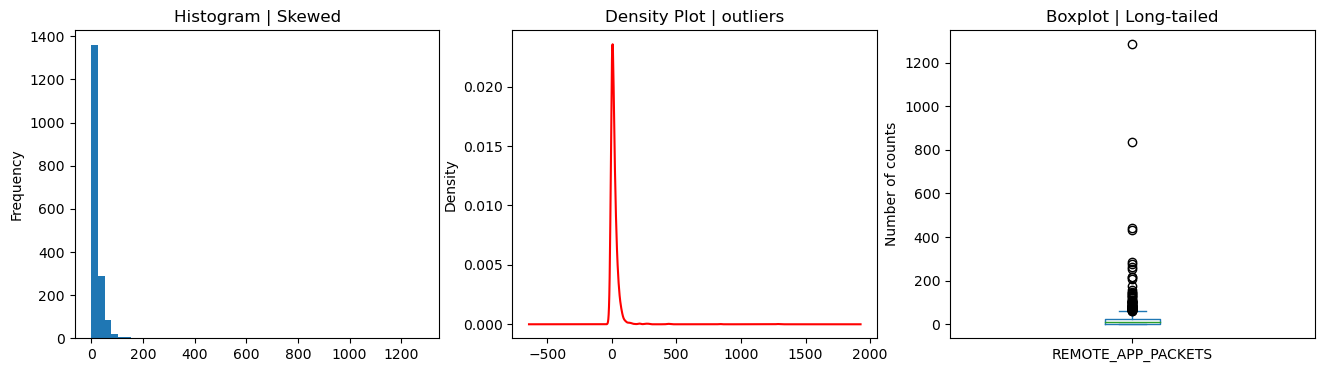

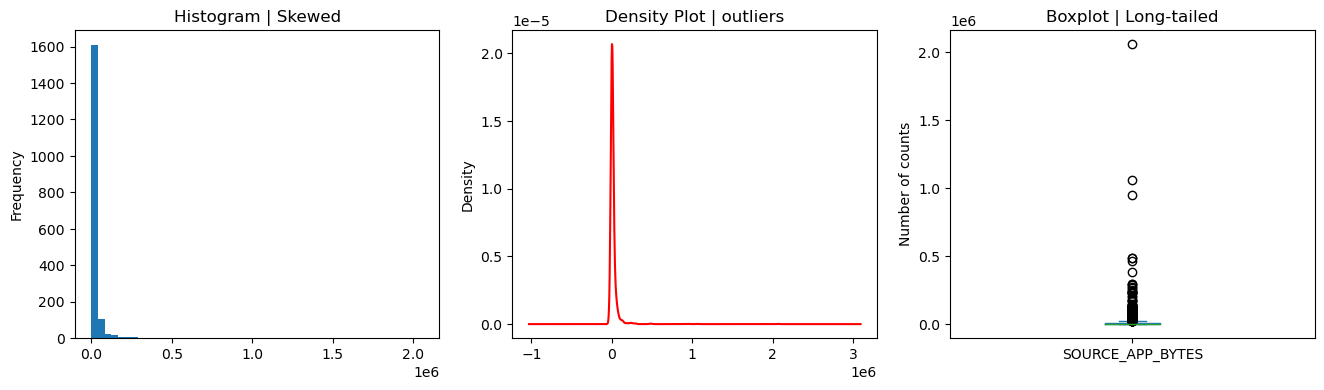

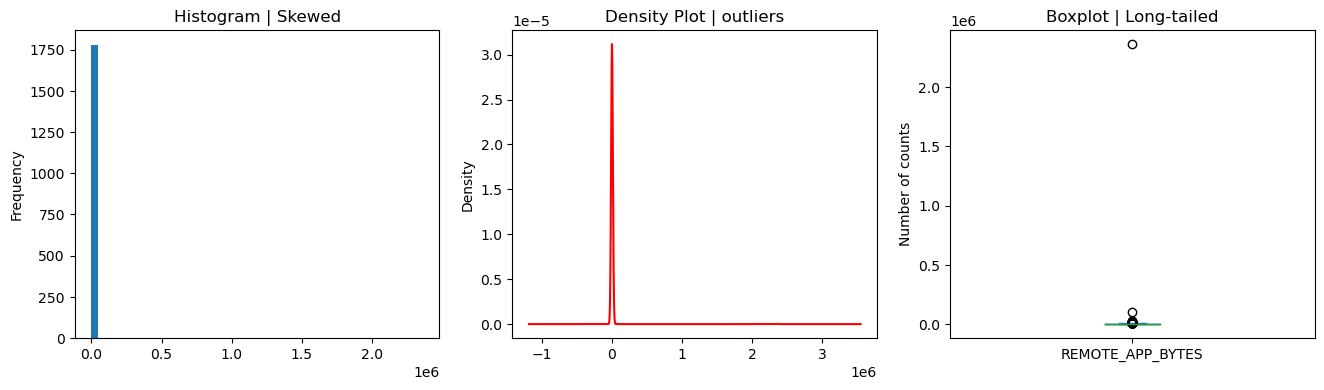

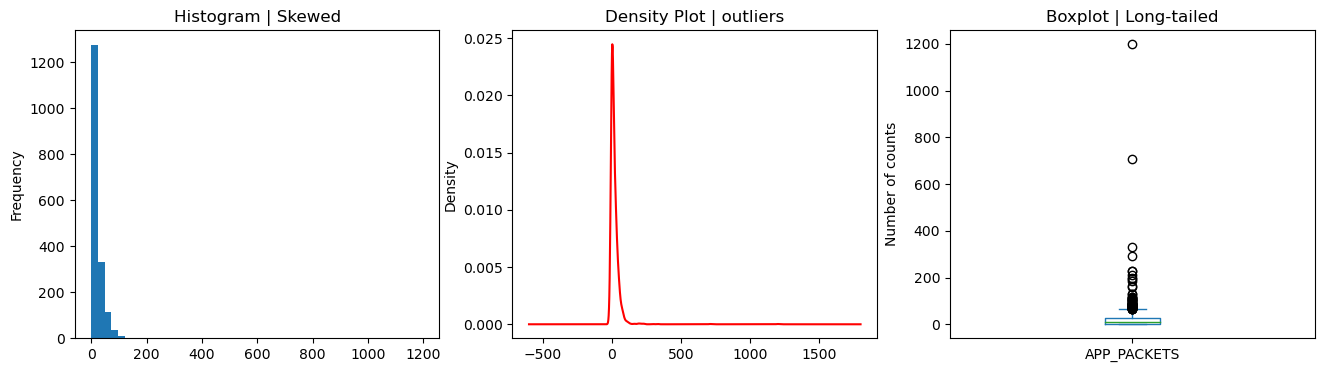

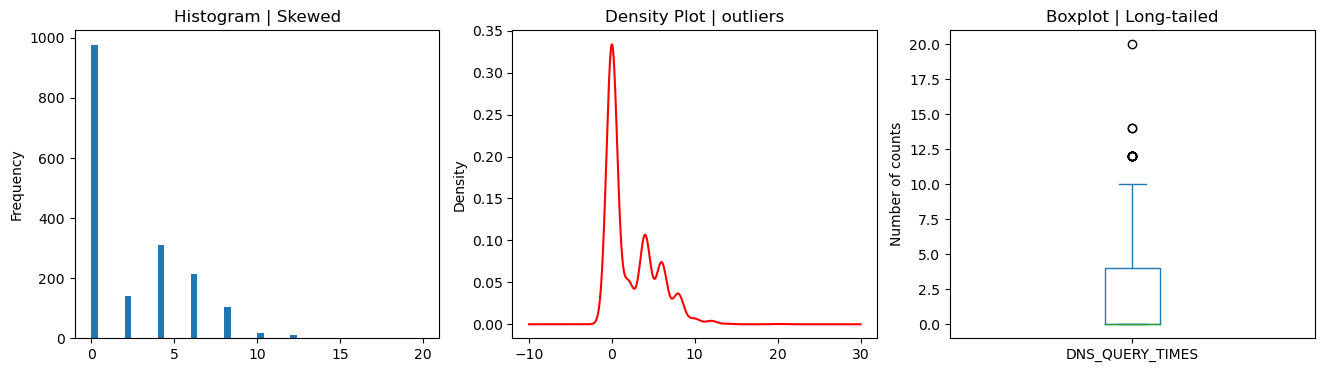

In [17]:
for i in numerical_category.columns:
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 4))
    numerical_category[i].plot(kind='hist', bins=50, ax=axes[0], xlabel=i,
                           title="Histogram | Skewed")
    numerical_category[i].plot(kind='density', color='r', ax=axes[1], title='Density Plot | outliers')
    numerical_category[i].plot(kind='box', ax=axes[2], ylabel='Number of counts',
                           xlabel='', title='Boxplot | Long-tailed')
    plt.show()

### 2.6 Bivariate Analysis - does a continuous variable look predictive of type

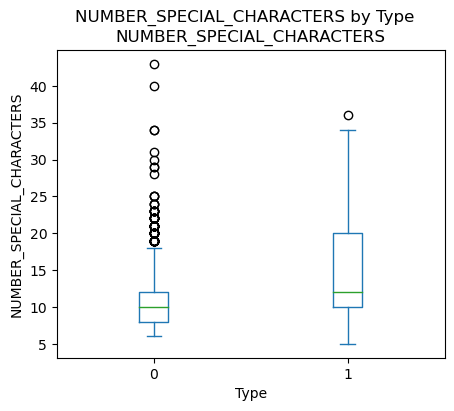

In [18]:
df.plot(column="NUMBER_SPECIAL_CHARACTERS", by='Type', kind='box', subplots=False, 
        xlabel='Type', ylabel="NUMBER_SPECIAL_CHARACTERS", 
        title="NUMBER_SPECIAL_CHARACTERS by Type", figsize=(5, 4))
plt.xlabel('Type') 
plt.show()

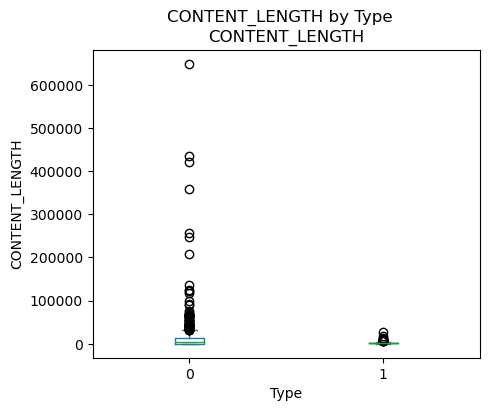

In [19]:
df.plot(column="CONTENT_LENGTH", by='Type', kind='box', subplots=False, 
        xlabel='Type', ylabel="CONTENT_LENGTH", 
        title="CONTENT_LENGTH by Type", figsize=(5, 4))
plt.xlabel('Type')  # for some reason, xlabel arg on df.plot didn't work
plt.show()

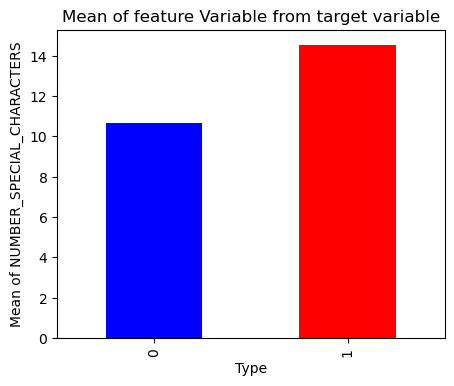

In [20]:
df.groupby('Type')['NUMBER_SPECIAL_CHARACTERS'].mean().plot(kind='bar', 
                                                           ylabel='Mean of NUMBER_SPECIAL_CHARACTERS',
                                                           figsize=(5, 4), 
                                                           color=['blue', 'red'])
plt.title("Mean of feature Variable from target variable")
plt.show() 
# malicious webs here in the dataset holds more special characters than safe webs 

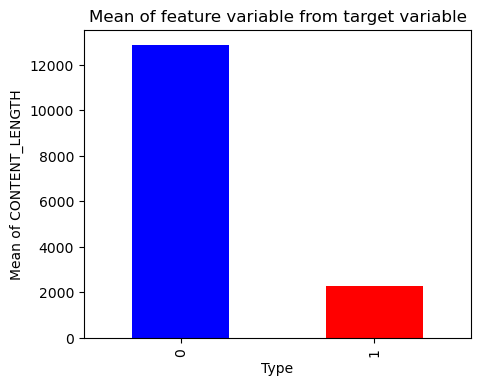

In [21]:
df.groupby('Type')['CONTENT_LENGTH'].mean().plot(kind='bar', 
                                                           ylabel='Mean of CONTENT_LENGTH',
                                                           figsize=(5, 4), 
                                                           color=['blue', 'red'])
plt.title("Mean of feature variable from target variable")
plt.show()

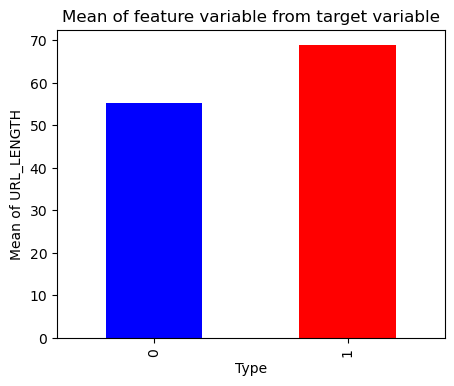

In [22]:
df.groupby('Type')['URL_LENGTH'].mean().plot(kind='bar', ylabel='Mean of URL_LENGTH', figsize=(5, 4),
                                             color=['blue', 'red'])
plt.title("Mean of feature variable from target variable")
plt.show()
# longer number of url length has more malicious webs 

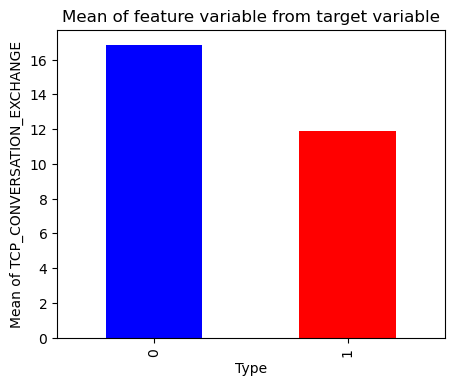

In [23]:
df.groupby('Type')['TCP_CONVERSATION_EXCHANGE'].mean().plot(kind='bar', 
                                                            ylabel='Mean of TCP_CONVERSATION_EXCHANGE',
                                                            figsize=(5, 4),
                                                            color=['blue', 'red'])
plt.title("Mean of feature variable from target variable")
plt.show()

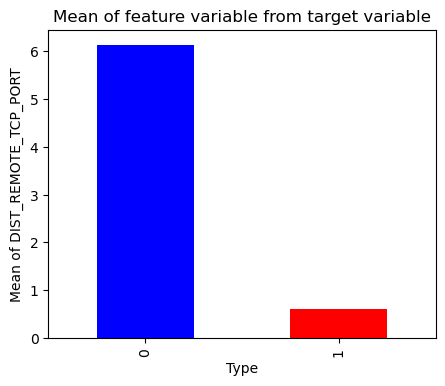

In [24]:
df.groupby('Type')['DIST_REMOTE_TCP_PORT'].mean().plot(kind='bar', 
                                                        ylabel='Mean of DIST_REMOTE_TCP_PORT',
                                                        figsize=(5, 4),
                                                        color=['blue', 'red'])
plt.title("Mean of feature variable from target variable")
plt.show()
plt.show()

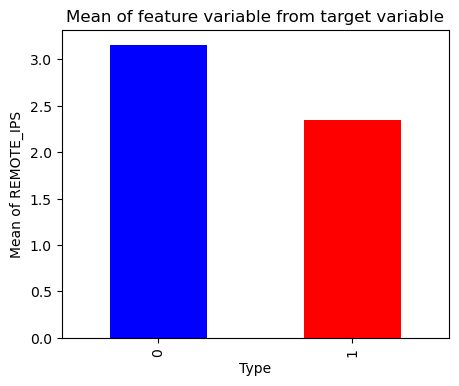

In [25]:
df.groupby('Type')['REMOTE_IPS'].mean().plot(kind='bar', ylabel='Mean of REMOTE_IPS',
                                             figsize=(5, 4),
                                             color=['blue', 'red'])
plt.title("Mean of feature variable from target variable")
plt.show()

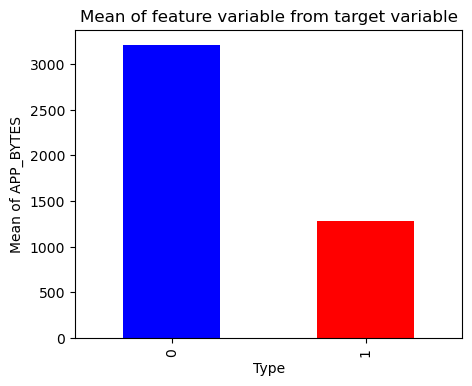

In [26]:
df.groupby('Type')['APP_BYTES'].mean().plot(kind='bar', ylabel='Mean of APP_BYTES', figsize=(5, 4),
                                            color=['blue', 'red'])
plt.title("Mean of feature variable from target variable")
plt.show()

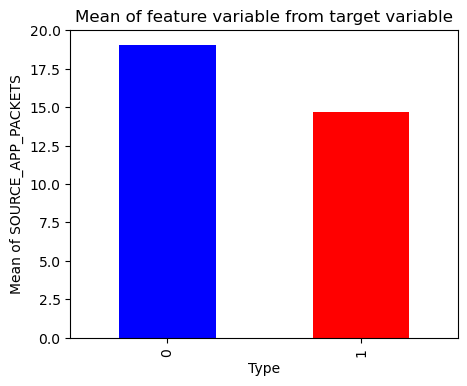

In [27]:
df.groupby('Type')['SOURCE_APP_PACKETS'].mean().plot(kind='bar', ylabel='Mean of SOURCE_APP_PACKETS',
                                                    figsize=(5, 4),
                                                    color=['blue', 'red'])
plt.title("Mean of feature variable from target variable")
plt.show()

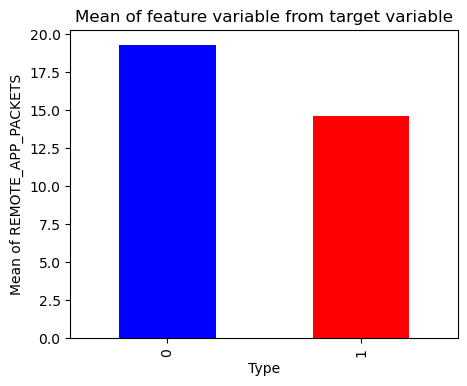

In [28]:
df.groupby('Type')['REMOTE_APP_PACKETS'].mean().plot(kind='bar', ylabel='Mean of REMOTE_APP_PACKETS',
                                                           figsize=(5, 4),
                                                            color=['blue', 'red'])
plt.title("Mean of feature variable from target variable")
plt.show()

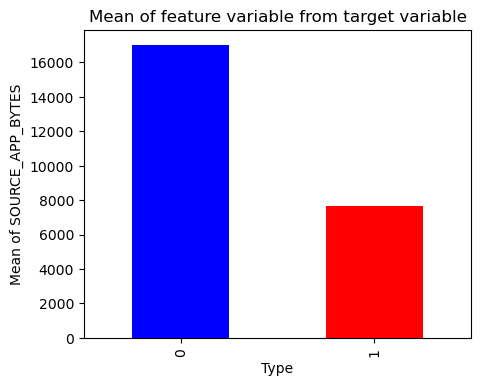

In [29]:
df.groupby('Type')['SOURCE_APP_BYTES'].mean().plot(kind='bar', ylabel='Mean of SOURCE_APP_BYTES',
                                                           figsize=(5, 4),
                                                            color=['blue', 'red'])
plt.title("Mean of feature variable from target variable")
plt.show()

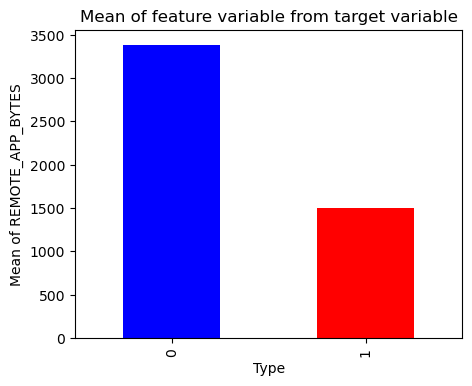

In [30]:
df.groupby('Type')['REMOTE_APP_BYTES'].mean().plot(kind='bar', ylabel='Mean of REMOTE_APP_BYTES',
                                                           figsize=(5, 4),
                                                            color=['blue', 'red'])
plt.title("Mean of feature variable from target variable")
plt.show()

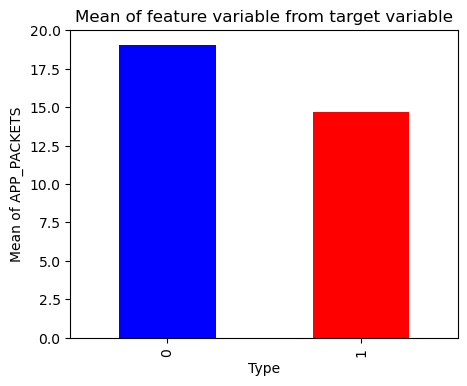

In [31]:
df.groupby('Type')['APP_PACKETS'].mean().plot(kind='bar', ylabel='Mean of APP_PACKETS',
                                                           figsize=(5, 4),
                                                            color=['blue', 'red'])
plt.title("Mean of feature variable from target variable")
plt.show()

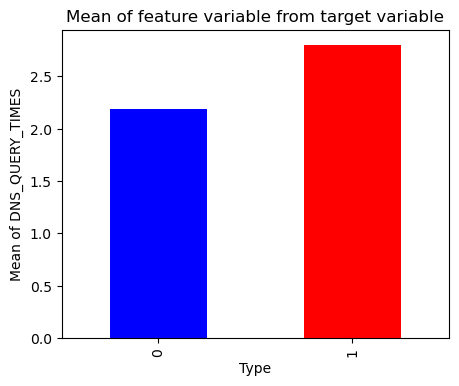

In [32]:
df.groupby('Type')['DNS_QUERY_TIMES'].mean().plot(kind='bar', ylabel='Mean of DNS_QUERY_TIMES',
                                                           figsize=(5, 4),
                                                            color=['blue', 'red'])
plt.title("Mean of feature variable from target variable")
plt.show()

* From analysing these feature in parallel with the target variable - Type, we can see the influence the features hold in the outcome of if a website is malicious or safe. Hence we now proceed with data preprocessing with the analysation we have.

## 3. Preprocessing data using Pandas
### 3.1 Missing value imputation

* ***df*.isnull()** is used to identify missing values

In [33]:
# counts the null/NaN/missing values for each variable
df.isnull().sum()

URL_LENGTH                     0
NUMBER_SPECIAL_CHARACTERS      0
CHARSET                        0
SERVER                         1
CONTENT_LENGTH               812
WHOIS_COUNTRY                  0
WHOIS_STATEPRO                 0
WHOIS_REGDATE                  0
WHOIS_UPDATED_DATE             0
TCP_CONVERSATION_EXCHANGE      0
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
APP_BYTES                      0
SOURCE_APP_PACKETS             0
REMOTE_APP_PACKETS             0
SOURCE_APP_BYTES               0
REMOTE_APP_BYTES               0
APP_PACKETS                    0
DNS_QUERY_TIMES                1
Type                           0
dtype: int64

In [34]:
# fills the missing values in categorical variables with the mode/most frequent state in that column
df['SERVER'] = df['SERVER'].fillna(df['SERVER'].mode()[0])
df['CONTENT_LENGTH'] = df['CONTENT_LENGTH'].fillna(df['CONTENT_LENGTH'].mode()[0])
df['DNS_QUERY_TIMES'] = df['DNS_QUERY_TIMES'].fillna(df['DNS_QUERY_TIMES'].mode()[0])

df = df.interpolate()

In [35]:
# timestamps in this project are considered as categorical values
# as the column contains the string "None" instead of missing values, 00:00:00 is used to fill it
df.loc[df['WHOIS_REGDATE'] == 'None', 'WHOIS_REGDATE'] = pd.Timestamp('00:00:00').strftime('%H:%M:%S')
df.loc[df['WHOIS_UPDATED_DATE'] == 'None', 'WHOIS_UPDATED_DATE'] = pd.Timestamp('00:00:00').strftime('%H:%M:%S')

In [36]:
df.isnull().sum() # We have successfully replaced all missing values as seen from below

URL_LENGTH                   0
NUMBER_SPECIAL_CHARACTERS    0
CHARSET                      0
SERVER                       0
CONTENT_LENGTH               0
WHOIS_COUNTRY                0
WHOIS_STATEPRO               0
WHOIS_REGDATE                0
WHOIS_UPDATED_DATE           0
TCP_CONVERSATION_EXCHANGE    0
DIST_REMOTE_TCP_PORT         0
REMOTE_IPS                   0
APP_BYTES                    0
SOURCE_APP_PACKETS           0
REMOTE_APP_PACKETS           0
SOURCE_APP_BYTES             0
REMOTE_APP_BYTES             0
APP_PACKETS                  0
DNS_QUERY_TIMES              0
Type                         0
dtype: int64

In [37]:
# Data cleanse for countries as we can notice from the graph above in Step 2.4,
# countries are duplicated in different country codes. Hence we merge the identical countries as one data

df['WHOIS_COUNTRY'].unique()
df['WHOIS_COUNTRY'] = np.where(df['WHOIS_COUNTRY'] =='United Kingdom', 'UK', df['WHOIS_COUNTRY'])
df['WHOIS_COUNTRY'] = np.where(df['WHOIS_COUNTRY'] =="[u'GB'; u'UK']", 'UK', df['WHOIS_COUNTRY'])
df['WHOIS_COUNTRY'] = np.where(df['WHOIS_COUNTRY'] =="GB", 'UK', df['WHOIS_COUNTRY'])

df['WHOIS_COUNTRY'] = np.where(df['WHOIS_COUNTRY'] =='us', 'US', df['WHOIS_COUNTRY'])
df['WHOIS_COUNTRY'] = np.where(df['WHOIS_COUNTRY'] =='se', 'SE', df['WHOIS_COUNTRY'])
df['WHOIS_COUNTRY'] = np.where(df['WHOIS_COUNTRY'] =='ru', 'RU', df['WHOIS_COUNTRY'])

<AxesSubplot:title={'center':'Feature variable'}, xlabel='WHOIS_COUNTRY', ylabel='Count'>

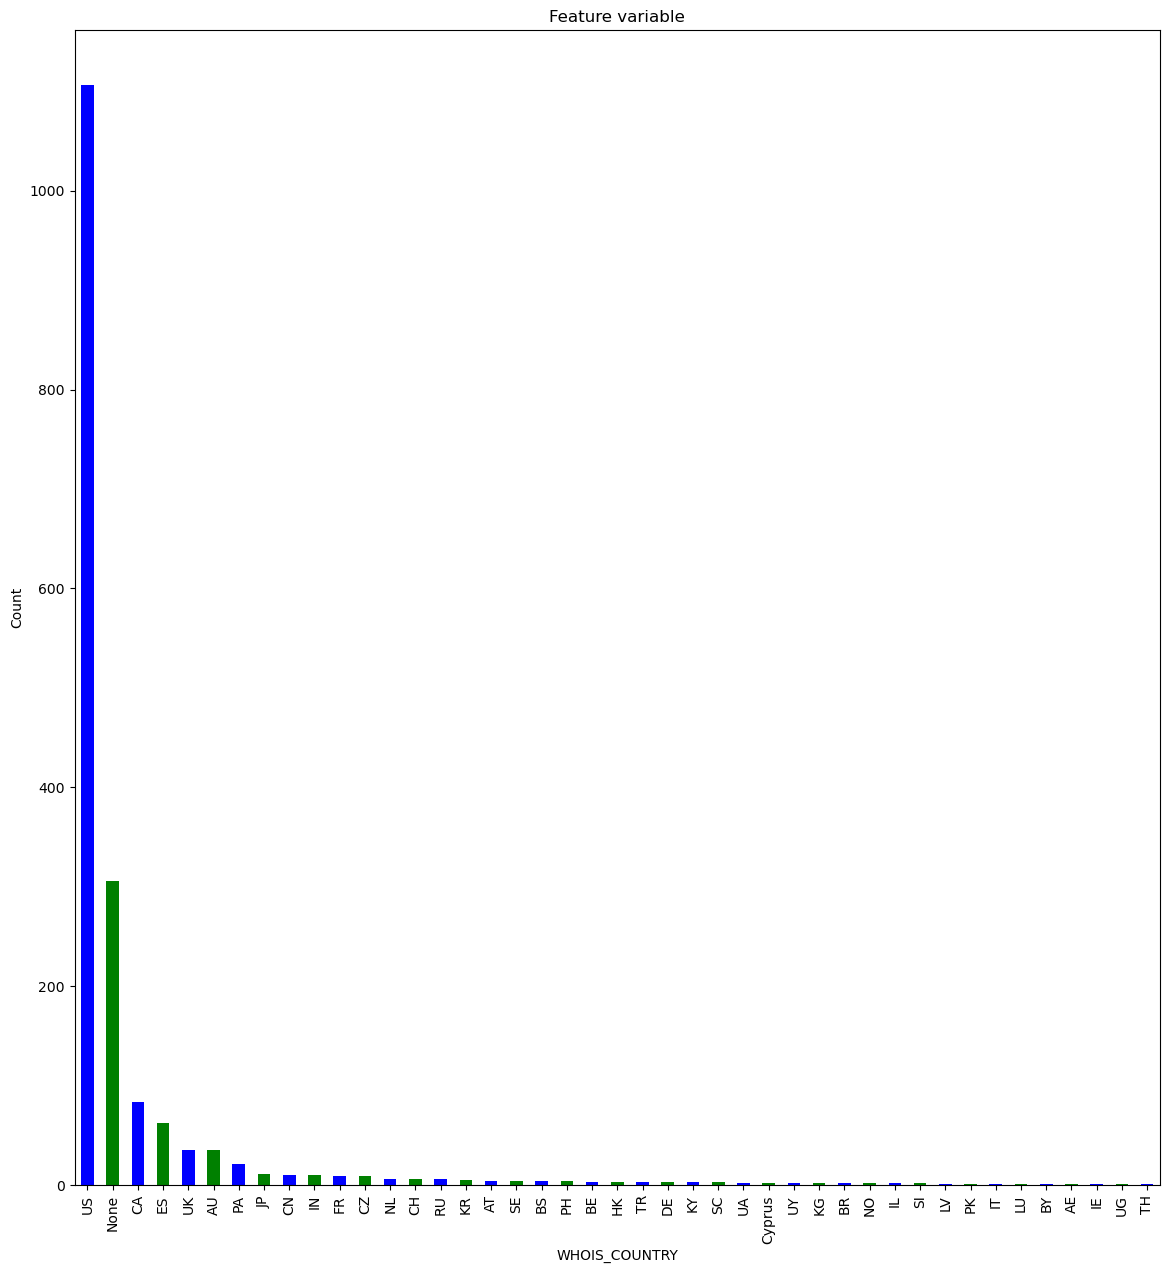

In [38]:
fig, axes = plt.subplots(figsize=(14, 15))

df['WHOIS_COUNTRY'].value_counts().plot(kind='bar',
                                title='Feature variable', color=['b', 'g'],
                                ylabel = 'Count', xlabel='WHOIS_COUNTRY')

In [39]:
df.head()

URL_LENGTH  NUMBER_SPECIAL_CHARACTERS     CHARSET                 SERVER  \
0          16                          7  iso-8859-1                  nginx   
1          16                          6       UTF-8          Apache/2.4.10   
2          16                          6    us-ascii  Microsoft-HTTPAPI/2.0   
3          17                          6  ISO-8859-1                  nginx   
4          17                          6       UTF-8                   None   

   CONTENT_LENGTH WHOIS_COUNTRY WHOIS_STATEPRO     WHOIS_REGDATE  \
0           263.0          None           None  10/10/2015 18:21   
1         15087.0          None           None          00:00:00   
2           324.0          None           None          00:00:00   
3           162.0            US             AK  07/10/1997 04:00   
4        124140.0            US             TX  12/05/1996 00:00   

  WHOIS_UPDATED_DATE  TCP_CONVERSATION_EXCHANGE  DIST_REMOTE_TCP_PORT  \
0           00:00:00                          7                     0   
1           00:00:00                         17                     7   
2           00:00:00                          0                     0   
3   12/09/2013 00:45                         31                    22   
4   11/04/2017 00:00                         57                     2   

   REMOTE_IPS  APP_BYTES  SOURCE_APP_PACKETS  REMOTE_APP_PACKETS  \
0           2        700                   9                  10   
1           4       1230                  17                  19   
2           0          0                   0                   0   
3           3       3812                  39                  37   
4           5       4278                  61                  62   

   SOURCE_APP_BYTES  REMOTE_APP_BYTES  APP_PACKETS  DNS_QUERY_TIMES Type  
0              1153               832            9              2.0    1  
1              1265              1230           17              0.0    0  
2                 0                 0            0              0.0    0  
3             18784              4380           39              8.0    0  
4            129889              4586           61              4.0    0

In [40]:
df_original = df.copy()

### 3.2 *Consider* adjusting distributions of continuous variables

* as we saw above, some distributions were quite skewed - to standardize them log normalization is utilized

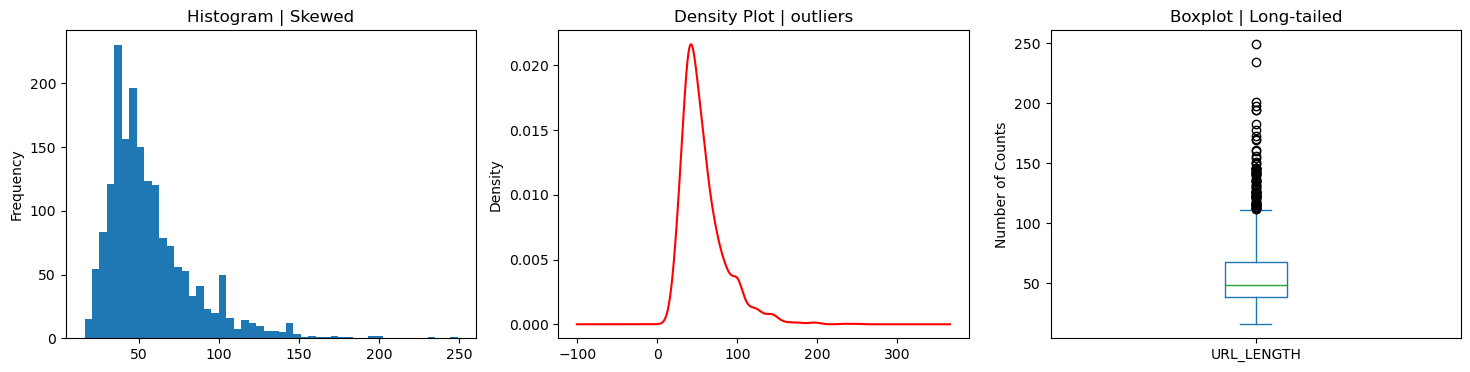

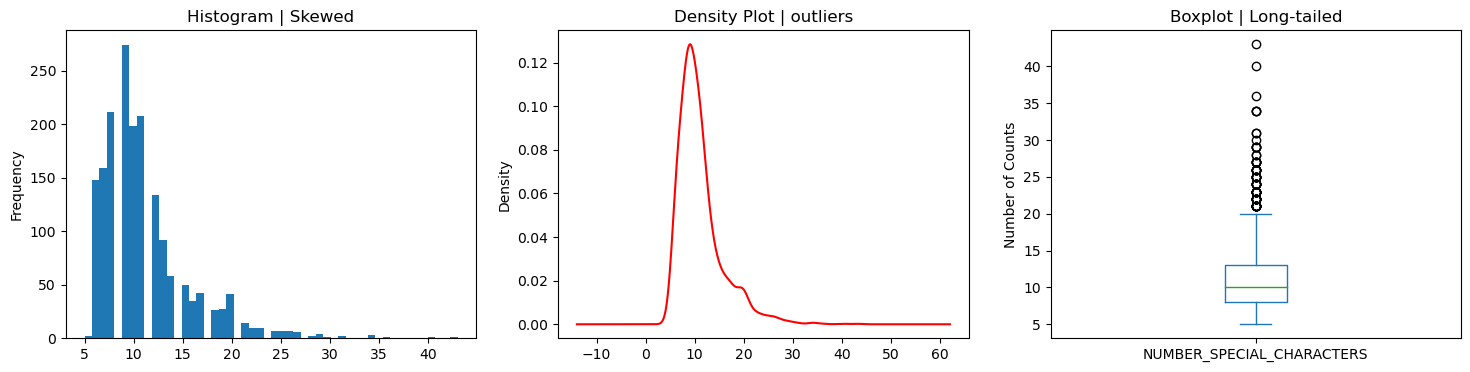

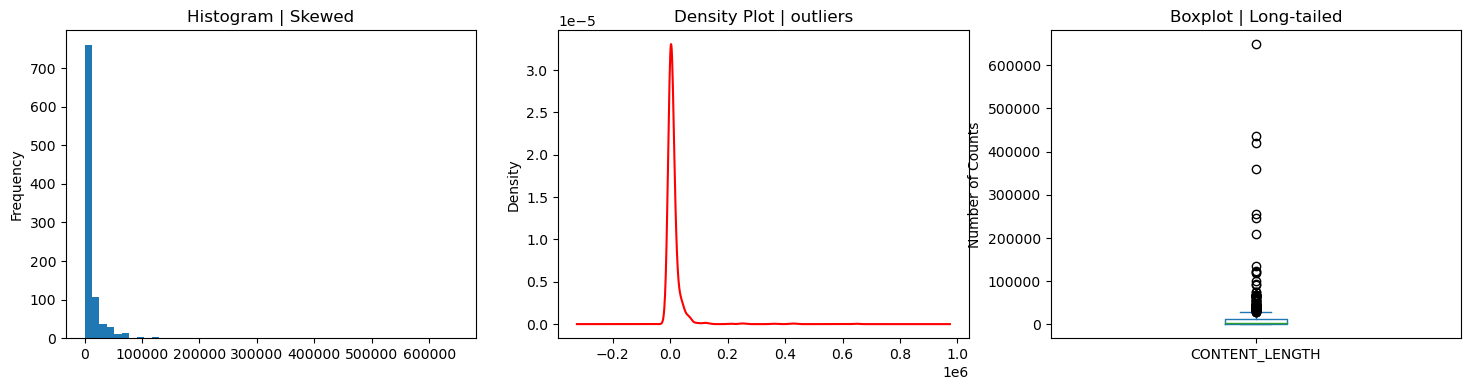

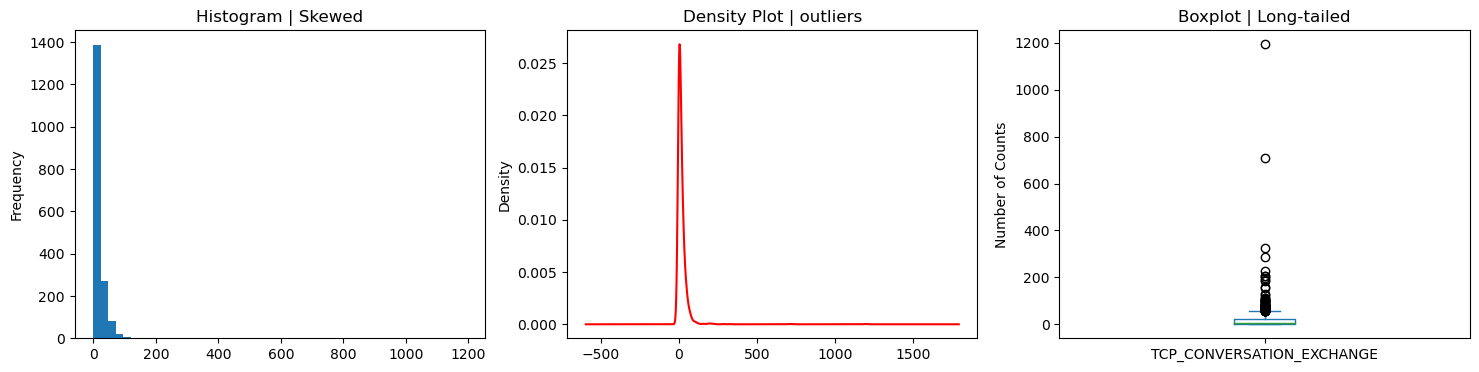

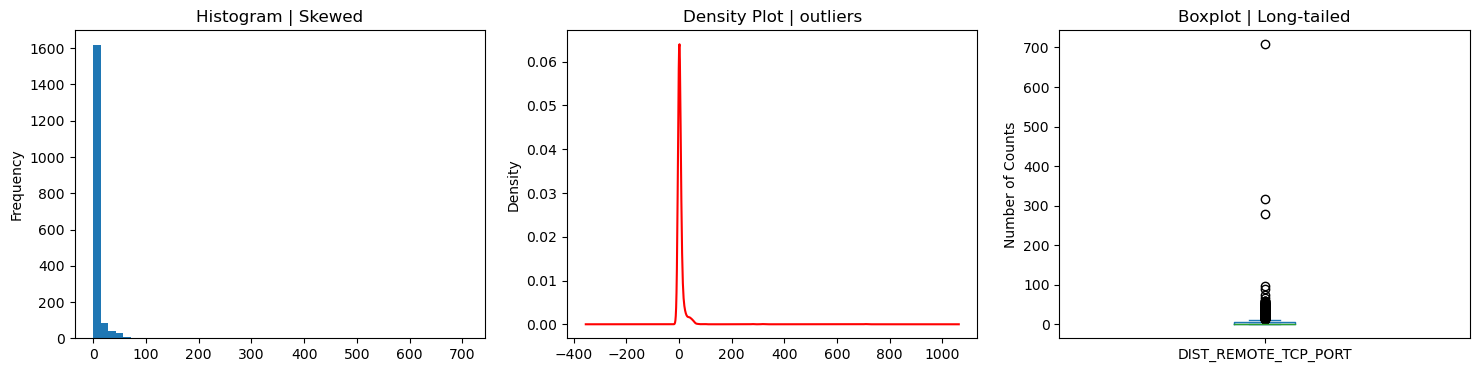

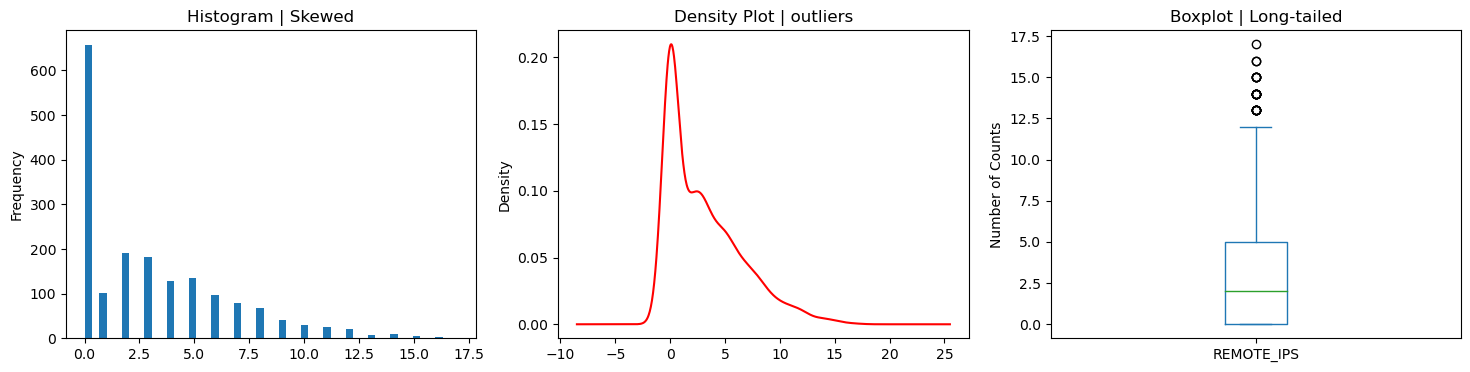

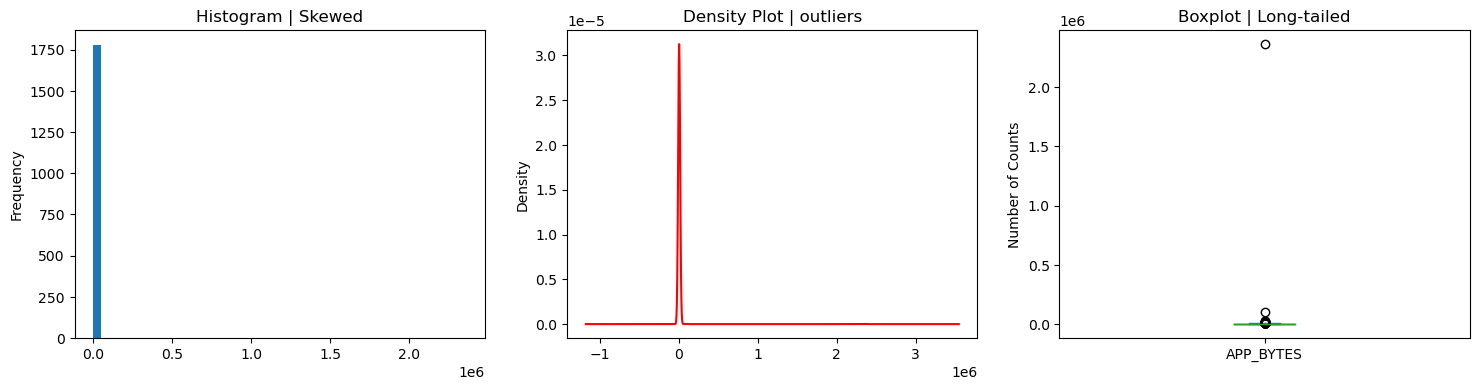

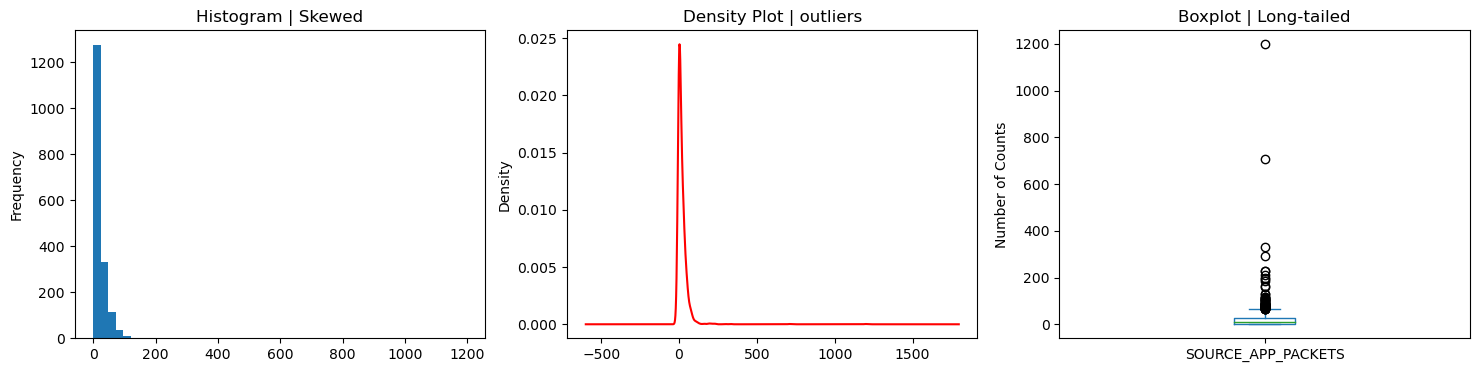

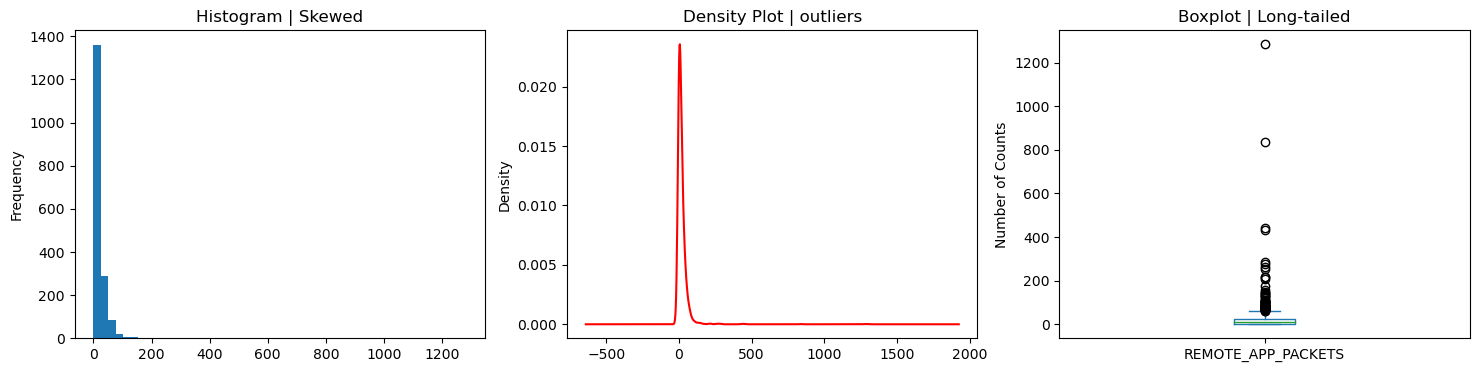

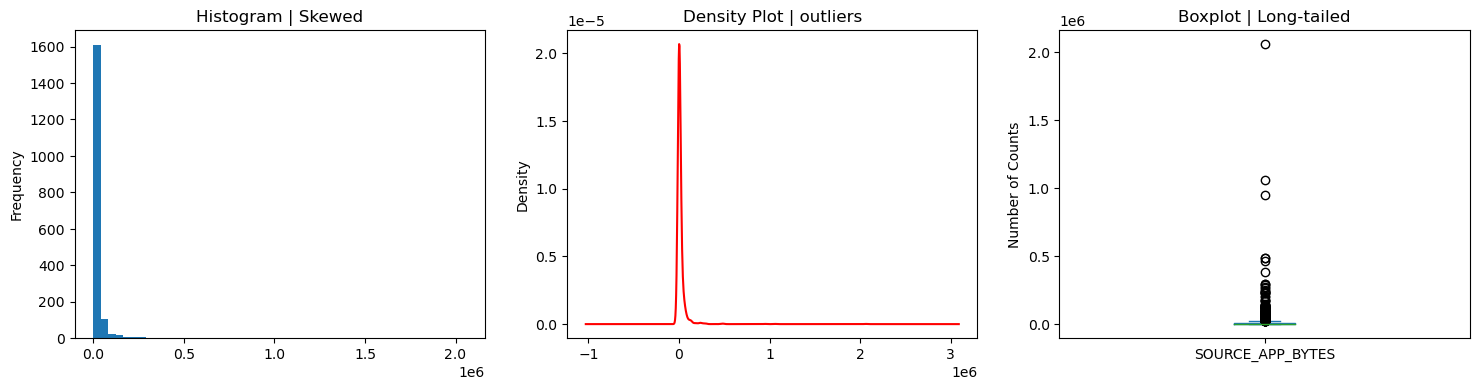

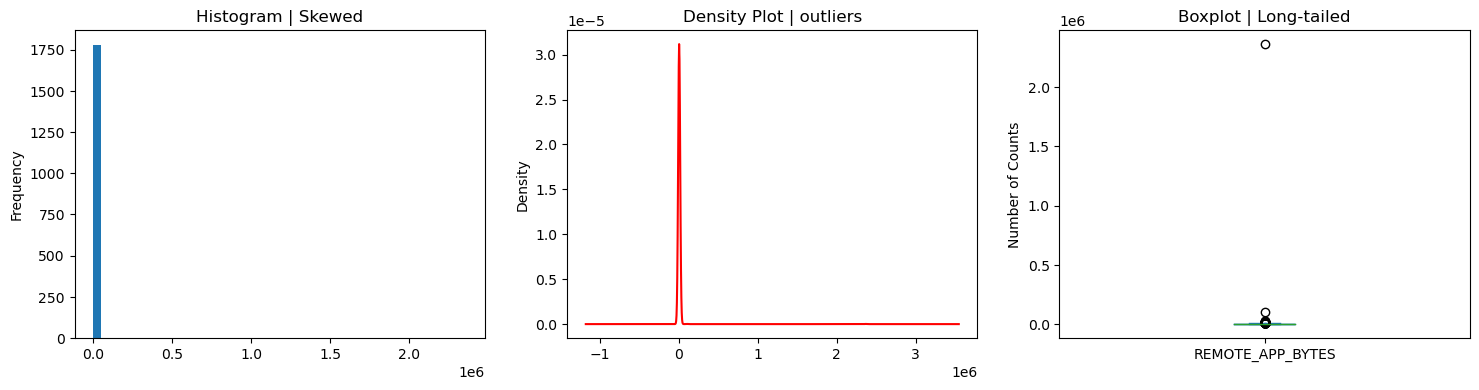

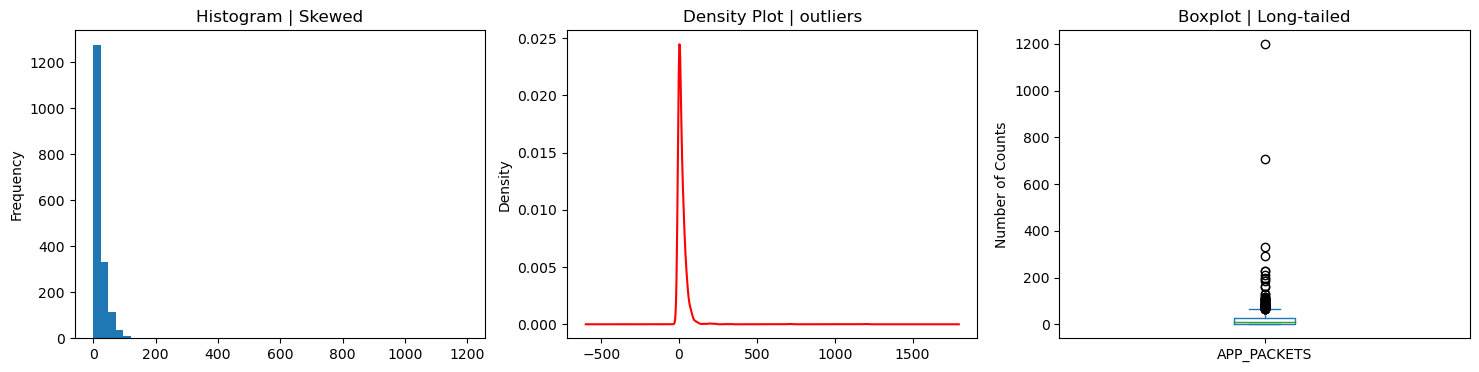

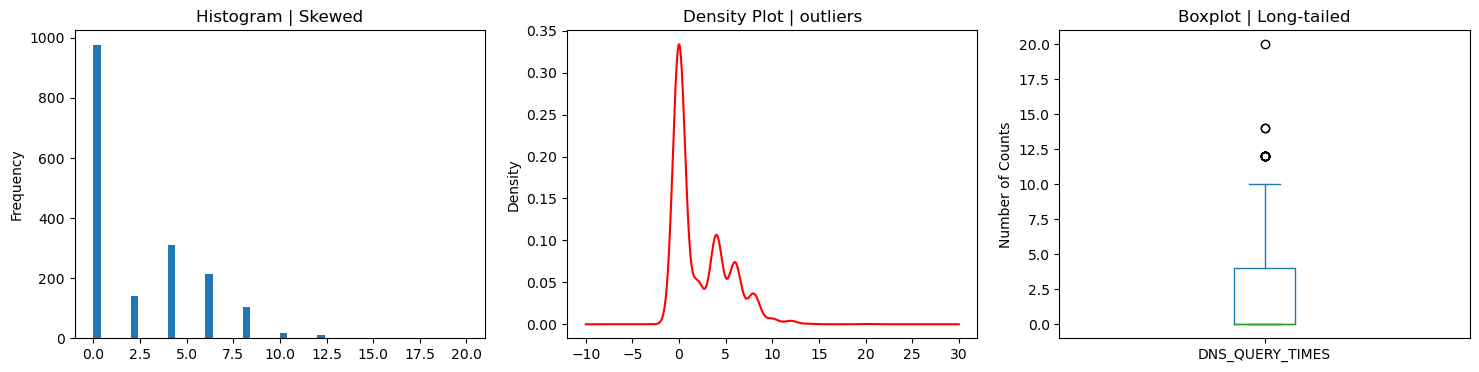

In [41]:
 # get the logarithmic scale of each variable not normally distributed
 # the "replace(0, 1)"" ensures we don't try to take the log of zero.
for i in numerical_category.columns:
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 4))
    numerical_category[i].plot(kind='hist', bins=50, ax=axes[0], xlabel=i,
                           title="Histogram | Skewed")
    numerical_category[i].plot(kind='density', color='r', ax=axes[1], title='Density Plot | outliers')
    numerical_category[i].plot(kind='box', ax=axes[2], ylabel='Number of Counts',
                           xlabel='', title='Boxplot | Long-tailed')
    plt.show()

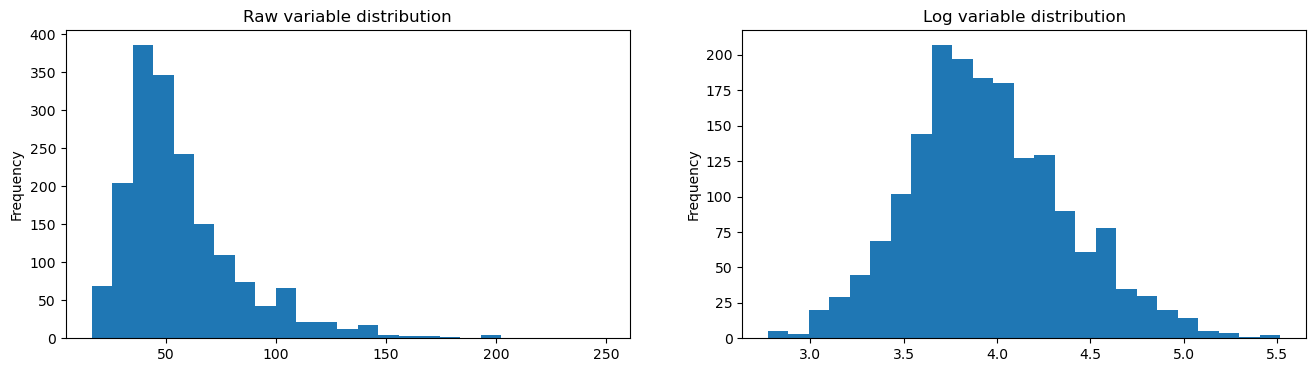

In [42]:
df['URL_LENGTH_LOG'] = np.log(df['URL_LENGTH'].replace(0,1))
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))
df['URL_LENGTH'].plot(kind='hist', bins=25, ax=axes[0], title='Raw variable distribution')
df['URL_LENGTH_LOG'].plot(kind='hist', bins=25, ax=axes[1], title='Log variable distribution')
plt.show()

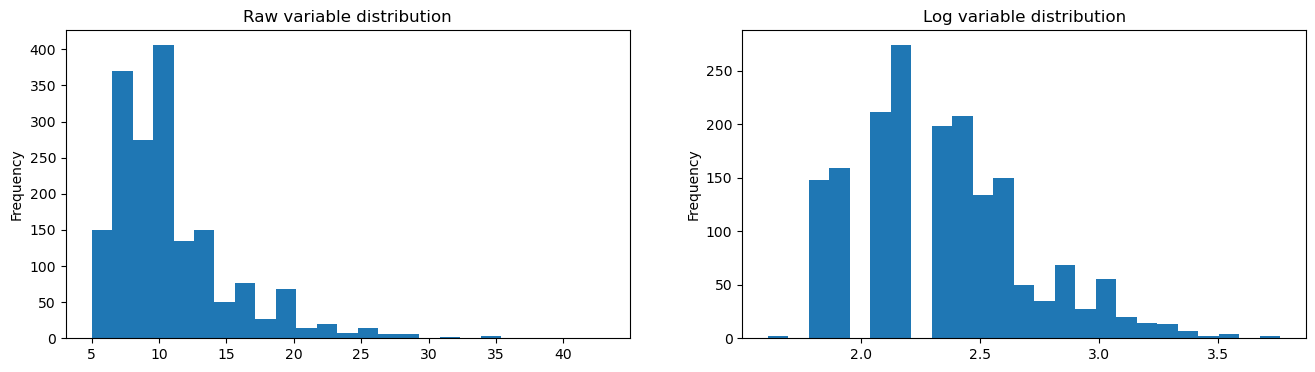

In [43]:
df['NUMBER_SPECIAL_CHARACTERS_LOG'] = np.log(df['NUMBER_SPECIAL_CHARACTERS'])
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))
df['NUMBER_SPECIAL_CHARACTERS'].plot(kind='hist', bins=25, ax=axes[0], title='Raw variable distribution')
df['NUMBER_SPECIAL_CHARACTERS_LOG'].plot(kind='hist', bins=25, ax=axes[1], title='Log variable distribution')
plt.show()

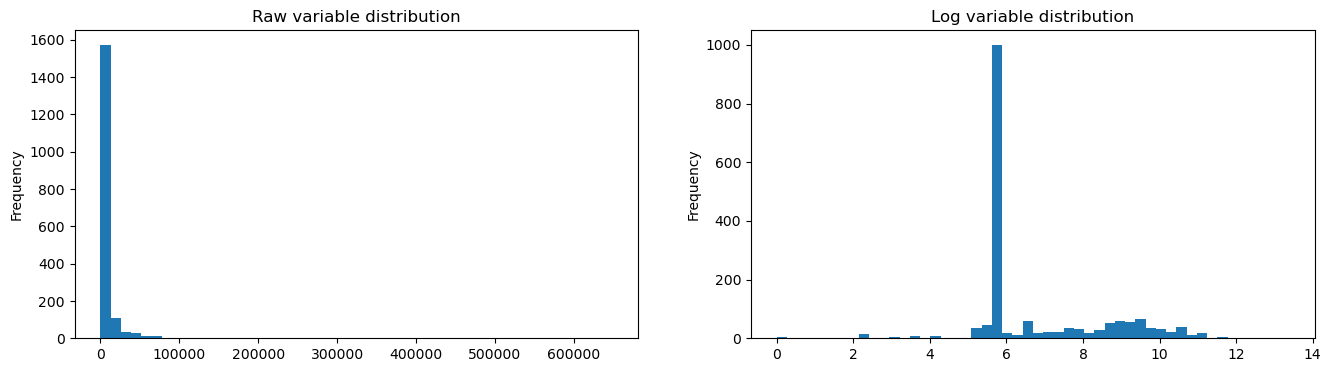

In [44]:
df['CONTENT_LENGTH_LOG'] = np.log(df['CONTENT_LENGTH'].replace(0,1))

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))
df['CONTENT_LENGTH'].plot(kind='hist', bins=50, ax=axes[0], title='Raw variable distribution')
df['CONTENT_LENGTH_LOG'].plot(kind='hist', bins=50, ax=axes[1], title='Log variable distribution')
plt.show()

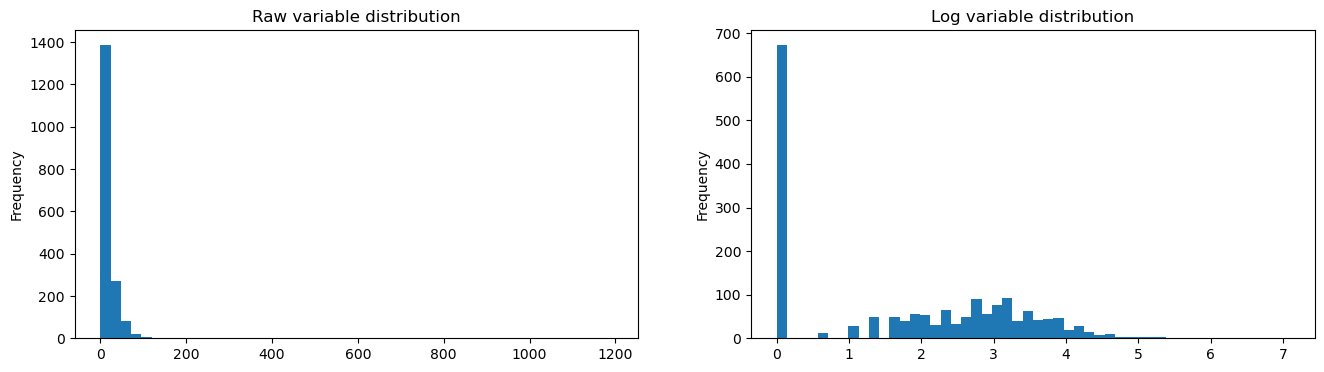

In [45]:
df['TCP_CONVERSATION_EXCHANGE_LOG'] = np.log(df['TCP_CONVERSATION_EXCHANGE'].replace(0,1))

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))
df['TCP_CONVERSATION_EXCHANGE'].plot(kind='hist', bins=50, ax=axes[0], title='Raw variable distribution')
df['TCP_CONVERSATION_EXCHANGE_LOG'].plot(kind='hist', bins=50, ax=axes[1], title='Log variable distribution')
plt.show()

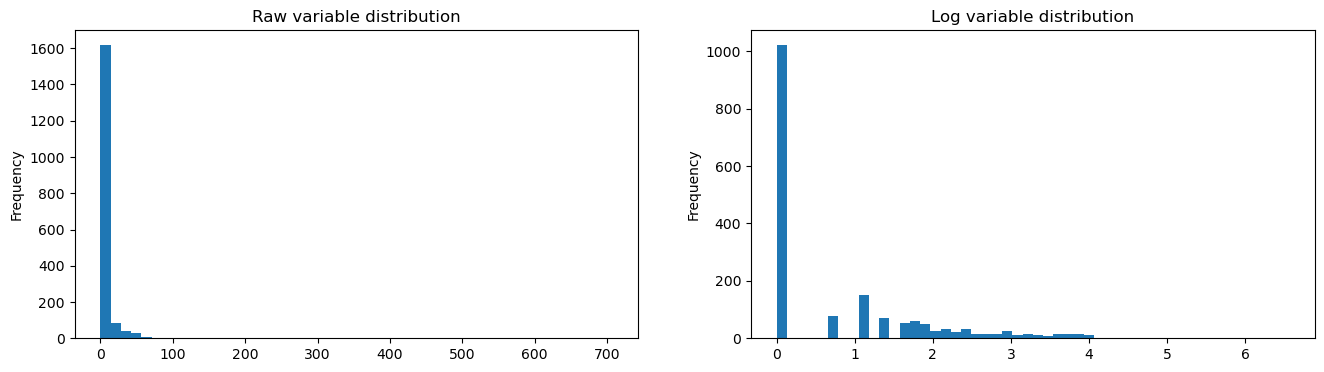

In [46]:
df['DIST_REMOTE_TCP_PORT_LOG'] = np.log(df['DIST_REMOTE_TCP_PORT'].replace(0,1))

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))
df['DIST_REMOTE_TCP_PORT'].plot(kind='hist', bins=50, ax=axes[0], title='Raw variable distribution')
df['DIST_REMOTE_TCP_PORT_LOG'].plot(kind='hist', bins=50, ax=axes[1], title='Log variable distribution')
plt.show()

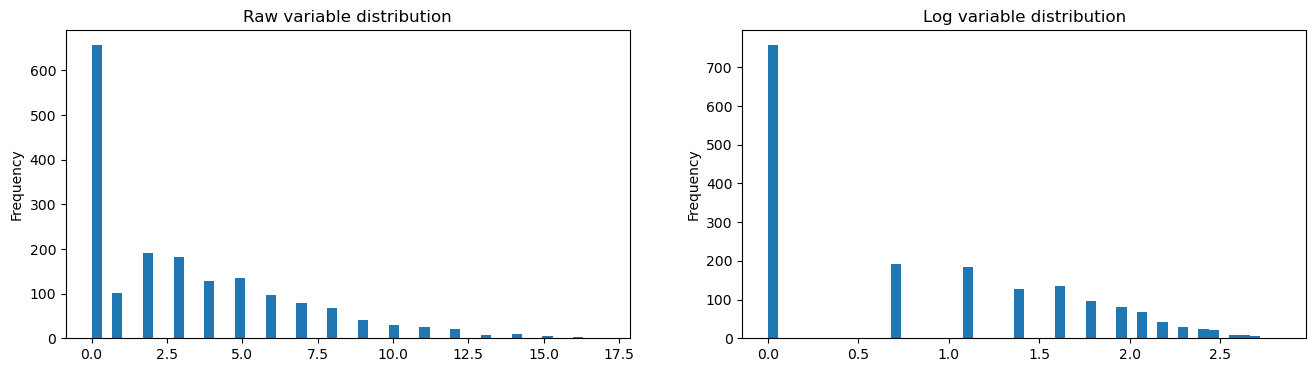

In [47]:
df['REMOTE_IPS_LOG'] = np.log(df['REMOTE_IPS'].replace(0,1))

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))
df['REMOTE_IPS'].plot(kind='hist', bins=50, ax=axes[0], title='Raw variable distribution')
df['REMOTE_IPS_LOG'].plot(kind='hist', bins=50, ax=axes[1], title='Log variable distribution')
plt.show()

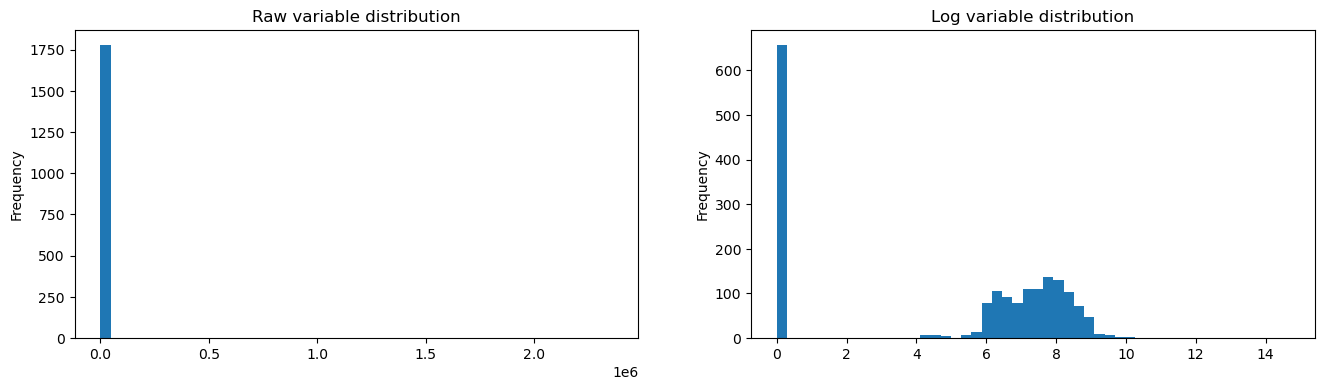

In [48]:
df['APP_BYTES_LOG'] = np.log(df['APP_BYTES'].replace(0,1))

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))
df['APP_BYTES'].plot(kind='hist', bins=50, ax=axes[0], title='Raw variable distribution')
df['APP_BYTES_LOG'].plot(kind='hist', bins=50, ax=axes[1], title='Log variable distribution')
plt.show()

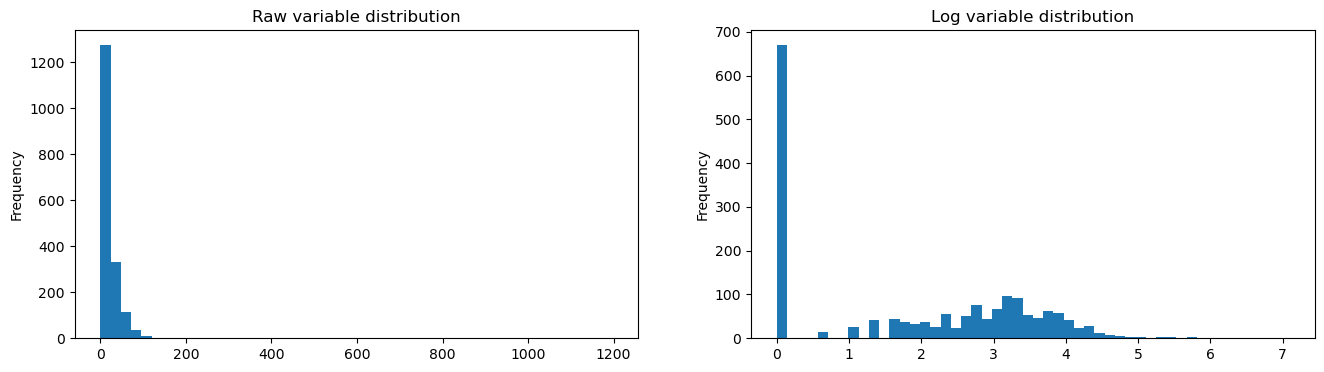

In [49]:
df['SOURCE_APP_PACKETS_LOG'] = np.log(df['SOURCE_APP_PACKETS'].replace(0,1))

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))
df['SOURCE_APP_PACKETS'].plot(kind='hist', bins=50, ax=axes[0], title='Raw variable distribution')
df['SOURCE_APP_PACKETS_LOG'].plot(kind='hist', bins=50, ax=axes[1], title='Log variable distribution')
plt.show()

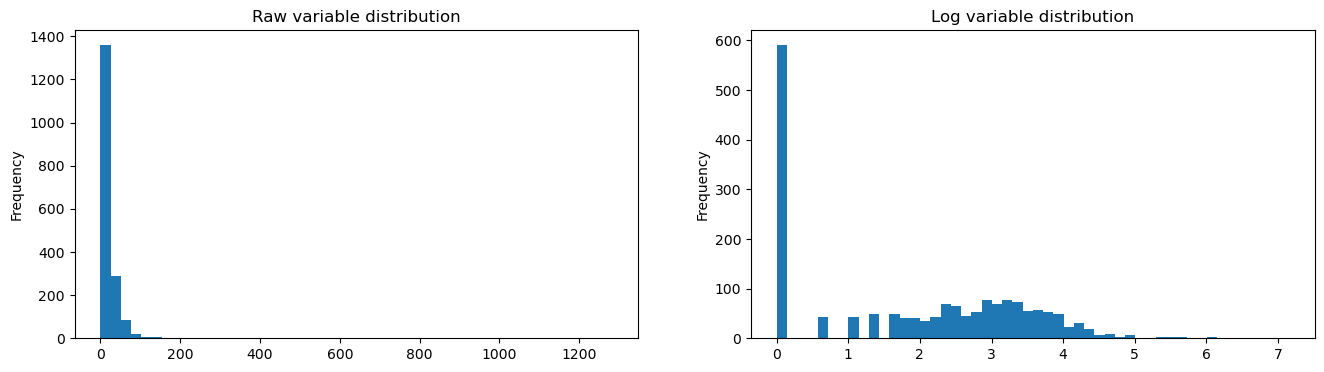

In [50]:
df['REMOTE_APP_PACKETS_LOG'] = np.log(df['REMOTE_APP_PACKETS'].replace(0,1))

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))
df['REMOTE_APP_PACKETS'].plot(kind='hist', bins=50, ax=axes[0], title='Raw variable distribution')
df['REMOTE_APP_PACKETS_LOG'].plot(kind='hist', bins=50, ax=axes[1], title='Log variable distribution')
plt.show()

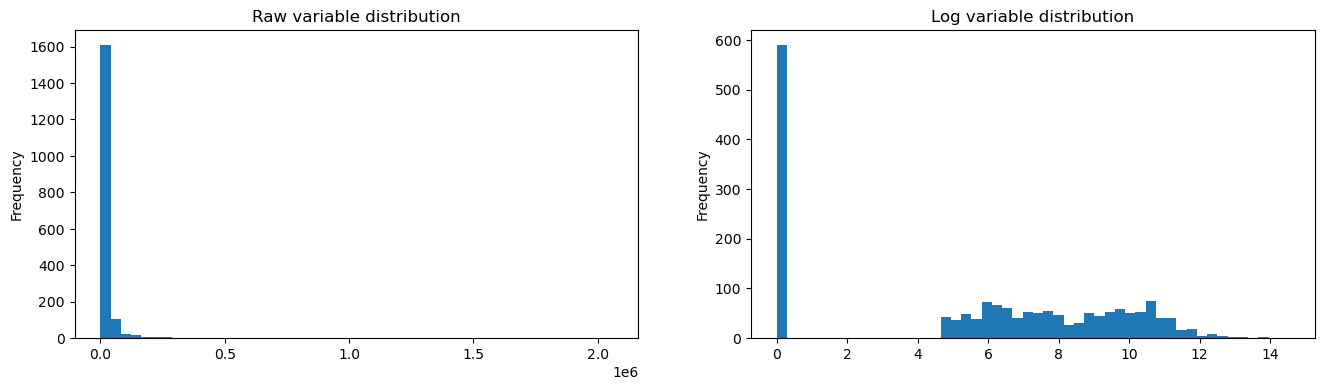

In [51]:
df['SOURCE_APP_BYTES_LOG'] = np.log(df['SOURCE_APP_BYTES'].replace(0,1))

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))
df['SOURCE_APP_BYTES'].plot(kind='hist', bins=50, ax=axes[0], title='Raw variable distribution')
df['SOURCE_APP_BYTES_LOG'].plot(kind='hist', bins=50, ax=axes[1], title='Log variable distribution')
plt.show()

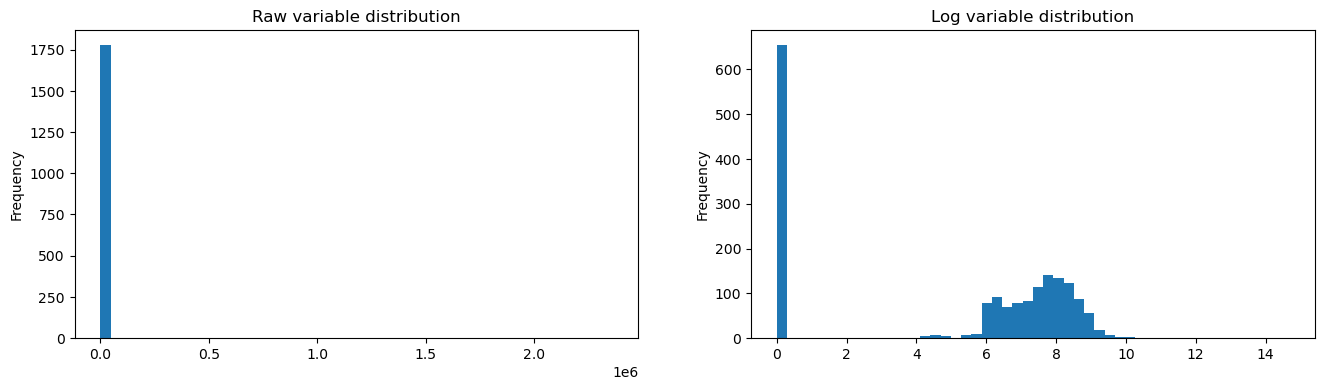

In [52]:
#     "REMOTE_APP_BYTES","APP_PACKETS","DNS_QUERY_TIMES"]]
df['REMOTE_APP_BYTES_LOG'] = np.log(df['REMOTE_APP_BYTES'].replace(0,1))

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))
df['REMOTE_APP_BYTES'].plot(kind='hist', bins=50, ax=axes[0], title='Raw variable distribution')
df['REMOTE_APP_BYTES_LOG'].plot(kind='hist', bins=50, ax=axes[1], title='Log variable distribution')
plt.show()

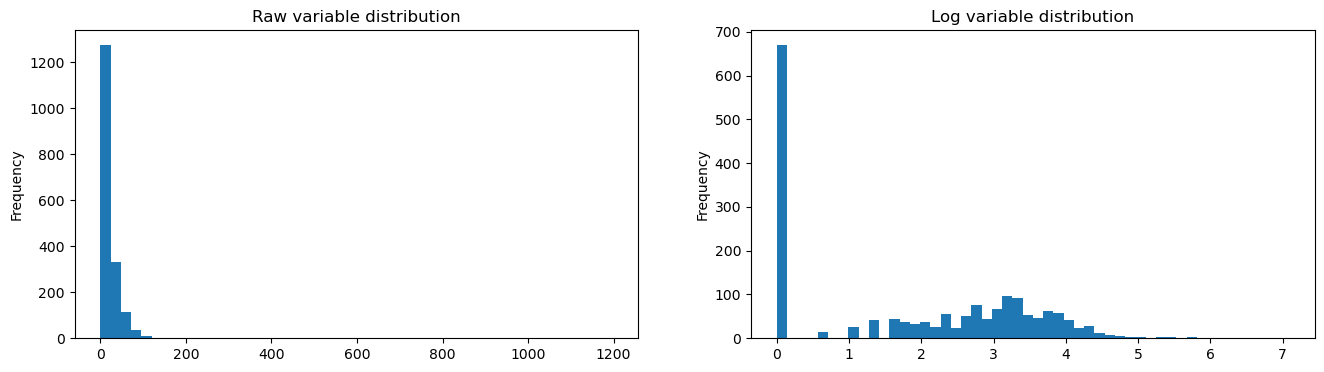

In [53]:
df['APP_PACKETS_LOG'] = np.log(df['APP_PACKETS'].replace(0,1))

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))
df['APP_PACKETS'].plot(kind='hist', bins=50, ax=axes[0], title='Raw variable distribution')
df['APP_PACKETS_LOG'].plot(kind='hist', bins=50, ax=axes[1], title='Log variable distribution')
plt.show()

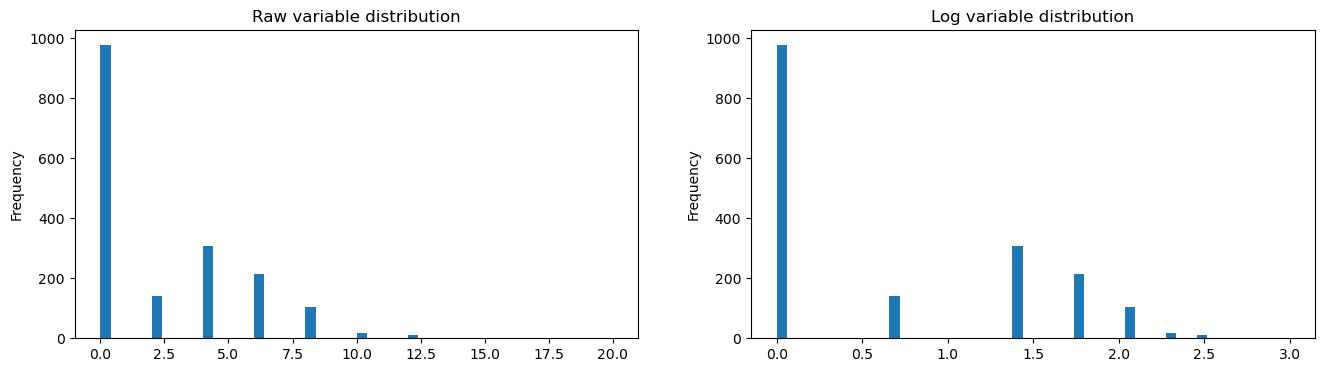

In [54]:
df['DNS_QUERY_TIMES_LOG'] = np.log(df['DNS_QUERY_TIMES'].replace(0,1))

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))
df['DNS_QUERY_TIMES'].plot(kind='hist', bins=50, ax=axes[0], title='Raw variable distribution')
df['DNS_QUERY_TIMES_LOG'].plot(kind='hist', bins=50, ax=axes[1], title='Log variable distribution')
plt.show()

In [55]:
df.head()

URL_LENGTH  NUMBER_SPECIAL_CHARACTERS     CHARSET                 SERVER  \
0          16                          7  iso-8859-1                  nginx   
1          16                          6       UTF-8          Apache/2.4.10   
2          16                          6    us-ascii  Microsoft-HTTPAPI/2.0   
3          17                          6  ISO-8859-1                  nginx   
4          17                          6       UTF-8                   None   

   CONTENT_LENGTH WHOIS_COUNTRY WHOIS_STATEPRO     WHOIS_REGDATE  \
0           263.0          None           None  10/10/2015 18:21   
1         15087.0          None           None          00:00:00   
2           324.0          None           None          00:00:00   
3           162.0            US             AK  07/10/1997 04:00   
4        124140.0            US             TX  12/05/1996 00:00   

  WHOIS_UPDATED_DATE  TCP_CONVERSATION_EXCHANGE  ...  \
0           00:00:00                          7  ...   
1           00:00:00                         17  ...   
2           00:00:00                          0  ...   
3   12/09/2013 00:45                         31  ...   
4   11/04/2017 00:00                         57  ...   

   TCP_CONVERSATION_EXCHANGE_LOG  DIST_REMOTE_TCP_PORT_LOG  REMOTE_IPS_LOG  \
0                       1.945910                  0.000000        0.693147   
1                       2.833213                  1.945910        1.386294   
2                       0.000000                  0.000000        0.000000   
3                       3.433987                  3.091042        1.098612   
4                       4.043051                  0.693147        1.609438   

   APP_BYTES_LOG  SOURCE_APP_PACKETS_LOG  REMOTE_APP_PACKETS_LOG  \
0       6.551080                2.197225                2.302585   
1       7.114769                2.833213                2.944439   
2       0.000000                0.000000                0.000000   
3       8.245909                3.663562                3.610918   
4       8.361241                4.110874                4.127134   

   SOURCE_APP_BYTES_LOG  REMOTE_APP_BYTES_LOG  APP_PACKETS_LOG  \
0              7.050123              6.723832         2.197225   
1              7.142827              7.114769         2.833213   
2              0.000000              0.000000         0.000000   
3              9.840761              8.384804         3.663562   
4             11.774436              8.430763         4.110874   

  DNS_QUERY_TIMES_LOG  
0            0.693147  
1            0.000000  
2            0.000000  
3            2.079442  
4            1.386294  

[5 rows x 33 columns]

### 3.3 *Consider* creating composite variables that might be more predictive

In [56]:
# Avg number of special characters per URL
df['AVG_SPECIAL_CHAR_IN_URLS'] = df['NUMBER_SPECIAL_CHARACTERS'] / df['URL_LENGTH']
df['AVG_SPECIAL_CHAR_IN_URLS_LOG'] = np.log(df['AVG_SPECIAL_CHAR_IN_URLS'])

# Total number of TCP conversations per remote IP
df['TOTAL_TCP_CONVERSATIONS_PER_REMOTE_IPS'] = df['TCP_CONVERSATION_EXCHANGE'] * df['REMOTE_IPS']
df['TOTAL_TCP_CONVERSATIONS_PER_REMOTE_IPS_LOG'] = np.log(df['TOTAL_TCP_CONVERSATIONS_PER_REMOTE_IPS'].replace(0,1))

# the below feature is decrepted due to errors with infinite values
# # Average packet size 
# df['AVG_EXCHANGED_PACKET_SIZE'] = (df['REMOTE_APP_PACKETS'] + df['SOURCE_APP_PACKETS']) / df['APP_PACKETS']
# df['AVG_EXCHANGED_PACKET_SIZE_LOG'] = np.log(df['AVG_EXCHANGED_PACKET_SIZE'])


In [57]:
df.head() 

URL_LENGTH  NUMBER_SPECIAL_CHARACTERS     CHARSET                 SERVER  \
0          16                          7  iso-8859-1                  nginx   
1          16                          6       UTF-8          Apache/2.4.10   
2          16                          6    us-ascii  Microsoft-HTTPAPI/2.0   
3          17                          6  ISO-8859-1                  nginx   
4          17                          6       UTF-8                   None   

   CONTENT_LENGTH WHOIS_COUNTRY WHOIS_STATEPRO     WHOIS_REGDATE  \
0           263.0          None           None  10/10/2015 18:21   
1         15087.0          None           None          00:00:00   
2           324.0          None           None          00:00:00   
3           162.0            US             AK  07/10/1997 04:00   
4        124140.0            US             TX  12/05/1996 00:00   

  WHOIS_UPDATED_DATE  TCP_CONVERSATION_EXCHANGE  ...  SOURCE_APP_PACKETS_LOG  \
0           00:00:00                          7  ...                2.197225   
1           00:00:00                         17  ...                2.833213   
2           00:00:00                          0  ...                0.000000   
3   12/09/2013 00:45                         31  ...                3.663562   
4   11/04/2017 00:00                         57  ...                4.110874   

   REMOTE_APP_PACKETS_LOG  SOURCE_APP_BYTES_LOG  REMOTE_APP_BYTES_LOG  \
0                2.302585              7.050123              6.723832   
1                2.944439              7.142827              7.114769   
2                0.000000              0.000000              0.000000   
3                3.610918              9.840761              8.384804   
4                4.127134             11.774436              8.430763   

   APP_PACKETS_LOG  DNS_QUERY_TIMES_LOG  AVG_SPECIAL_CHAR_IN_URLS  \
0         2.197225             0.693147                  0.437500   
1         2.833213             0.000000                  0.375000   
2         0.000000             0.000000                  0.375000   
3         3.663562             2.079442                  0.352941   
4         4.110874             1.386294                  0.352941   

   AVG_SPECIAL_CHAR_IN_URLS_LOG  TOTAL_TCP_CONVERSATIONS_PER_REMOTE_IPS  \
0                     -0.826679                                      14   
1                     -0.980829                                      68   
2                     -0.980829                                       0   
3                     -1.041454                                      93   
4                     -1.041454                                     285   

  TOTAL_TCP_CONVERSATIONS_PER_REMOTE_IPS_LOG  
0                                   2.639057  
1                                   4.219508  
2                                   0.000000  
3                                   4.532599  
4                                   5.652489  

[5 rows x 37 columns]

In [58]:
df.isnull().sum()

URL_LENGTH                                    0
NUMBER_SPECIAL_CHARACTERS                     0
CHARSET                                       0
SERVER                                        0
CONTENT_LENGTH                                0
WHOIS_COUNTRY                                 0
WHOIS_STATEPRO                                0
WHOIS_REGDATE                                 0
WHOIS_UPDATED_DATE                            0
TCP_CONVERSATION_EXCHANGE                     0
DIST_REMOTE_TCP_PORT                          0
REMOTE_IPS                                    0
APP_BYTES                                     0
SOURCE_APP_PACKETS                            0
REMOTE_APP_PACKETS                            0
SOURCE_APP_BYTES                              0
REMOTE_APP_BYTES                              0
APP_PACKETS                                   0
DNS_QUERY_TIMES                               0
Type                                          0
URL_LENGTH_LOG                          

### 3.4 Convert categorical variables to integer ones

* use **df.astype({*'colnam1'*: int, ...})** as most machine learning algorithms require numeric input
* You can alternatively use Scikit-learn's **LabelEncoder()** from **sklearn.preprocessing** module to convert categorical values to integer ones

In [59]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

for column in ['WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']:
    df[column] = le.fit_transform(df[column].astype(str))


print('CHARSET is originally a string variable:\n{}'.format(df['CHARSET'].value_counts()))
df['CHARSET'] = df['CHARSET'].astype('category').cat.codes
print('\CHARSET is converted to integer:\n{}'.format(df['CHARSET'].value_counts()))

df['SERVER'] = df['SERVER'].astype('category').cat.codes
df['WHOIS_COUNTRY'] = df['WHOIS_COUNTRY'].astype('category').cat.codes
df['WHOIS_STATEPRO'] = df['WHOIS_STATEPRO'].astype('category').cat.codes
df['Type'] = df['Type'].astype('category').cat.codes
    
print('\nData frame with categorical variables converted to integers:')
df.head()

CHARSET is originally a string variable:
UTF-8           676
ISO-8859-1      427
utf-8           379
us-ascii        155
iso-8859-1      134
None              7
windows-1251      1
ISO-8859          1
windows-1252      1
Name: CHARSET, dtype: int64
\CHARSET is converted to integer:
3    676
1    427
6    379
5    155
4    134
2      7
7      1
0      1
8      1
Name: CHARSET, dtype: int64

Data frame with categorical variables converted to integers:


URL_LENGTH  NUMBER_SPECIAL_CHARACTERS  CHARSET  SERVER  CONTENT_LENGTH  \
0          16                          7        4     200           263.0   
1          16                          6        3      61         15087.0   
2          16                          6        5     115           324.0   
3          17                          6        1     200           162.0   
4          17                          6        3     124        124140.0   

   WHOIS_COUNTRY  WHOIS_STATEPRO  WHOIS_REGDATE  WHOIS_UPDATED_DATE  \
0             28              98            314                   0   
1             28              98              1                   0   
2             28              98              1                   0   
3             41               4            201                 222   
4             41             137            348                 196   

   TCP_CONVERSATION_EXCHANGE  ...  SOURCE_APP_PACKETS_LOG  \
0                          7  ...                2.197225   
1                         17  ...                2.833213   
2                          0  ...                0.000000   
3                         31  ...                3.663562   
4                         57  ...                4.110874   

   REMOTE_APP_PACKETS_LOG  SOURCE_APP_BYTES_LOG  REMOTE_APP_BYTES_LOG  \
0                2.302585              7.050123              6.723832   
1                2.944439              7.142827              7.114769   
2                0.000000              0.000000              0.000000   
3                3.610918              9.840761              8.384804   
4                4.127134             11.774436              8.430763   

   APP_PACKETS_LOG  DNS_QUERY_TIMES_LOG  AVG_SPECIAL_CHAR_IN_URLS  \
0         2.197225             0.693147                  0.437500   
1         2.833213             0.000000                  0.375000   
2         0.000000             0.000000                  0.375000   
3         3.663562             2.079442                  0.352941   
4         4.110874             1.386294                  0.352941   

   AVG_SPECIAL_CHAR_IN_URLS_LOG  TOTAL_TCP_CONVERSATIONS_PER_REMOTE_IPS  \
0                     -0.826679                                      14   
1                     -0.980829                                      68   
2                     -0.980829                                       0   
3                     -1.041454                                      93   
4                     -1.041454                                     285   

   TOTAL_TCP_CONVERSATIONS_PER_REMOTE_IPS_LOG  
0                                    2.639057  
1                                    4.219508  
2                                    0.000000  
3                                    4.532599  
4                                    5.652489  

[5 rows x 37 columns]

## 4. Feature Selection

### 4.1 Look at correlations between each pair of variables using Pandas

Let's view the correlation between every pair of variables using Pandas
 * used ***dataframe*.corr()** - note only looks at numeric variables, so do this after you've converted categorical variables to integer

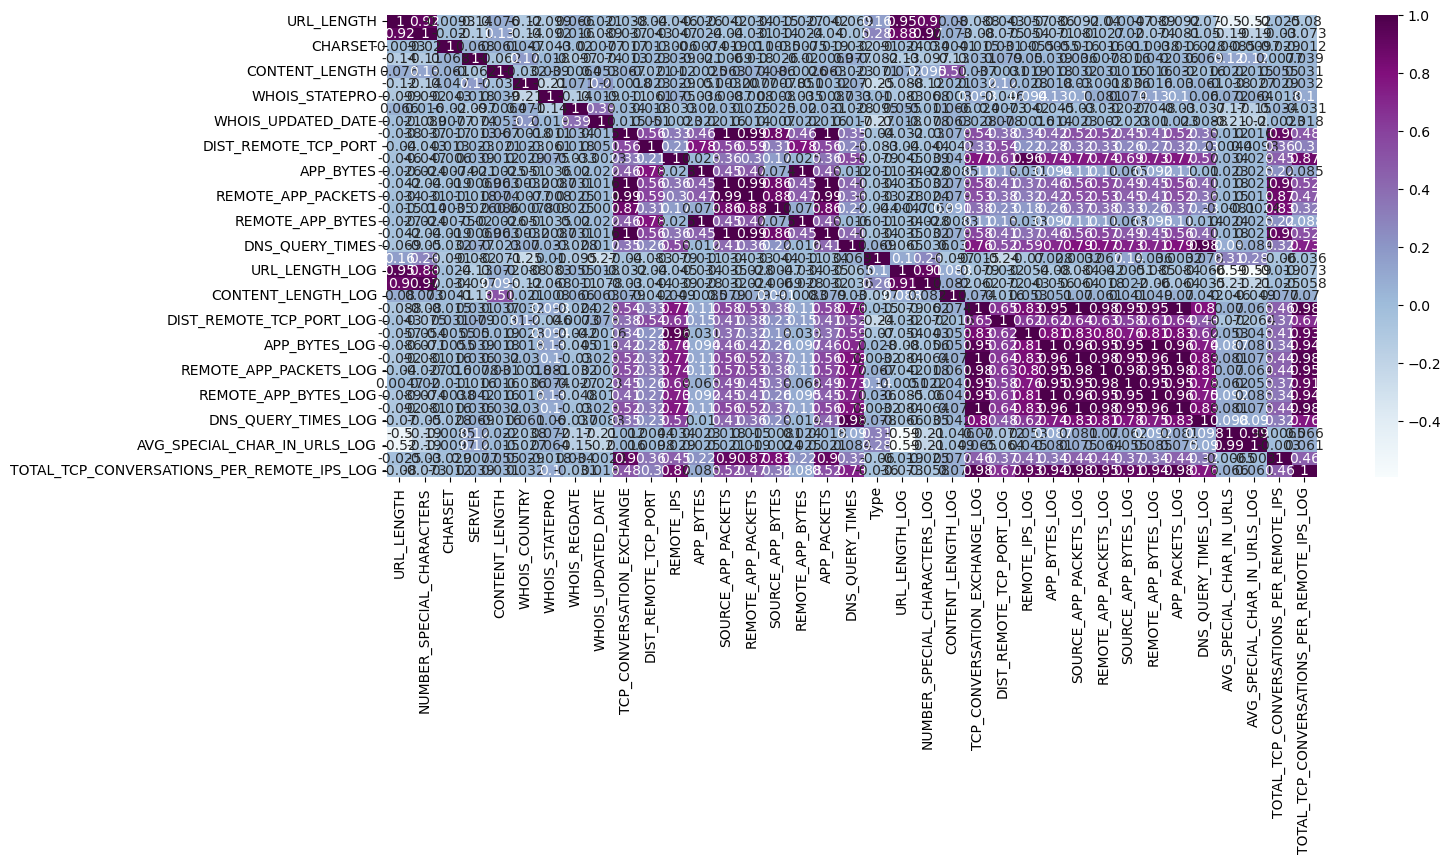

In [60]:
corr=df.corr() # gives us the correlation values
plt.figure(figsize=(15,6))
sns.heatmap(corr, annot = True, cmap="BuPu") 
plt.show()

As the values of log normalization are already present we can remove the data that was skewwed

Let's drop some feature variables that seem to be highly correlated with other features and are therefore maybe not providing any useful extra information.

In [61]:
cols = ["URL_LENGTH", "NUMBER_SPECIAL_CHARACTERS",
       "CONTENT_LENGTH","TCP_CONVERSATION_EXCHANGE",
       "DIST_REMOTE_TCP_PORT", "REMOTE_IPS",
       "APP_BYTES","SOURCE_APP_PACKETS",
       "REMOTE_APP_PACKETS","SOURCE_APP_BYTES",
       "REMOTE_APP_BYTES","APP_PACKETS","DNS_QUERY_TIMES", 
        "TOTAL_TCP_CONVERSATIONS_PER_REMOTE_IPS"]
df = df.drop(columns=cols,axis=1)

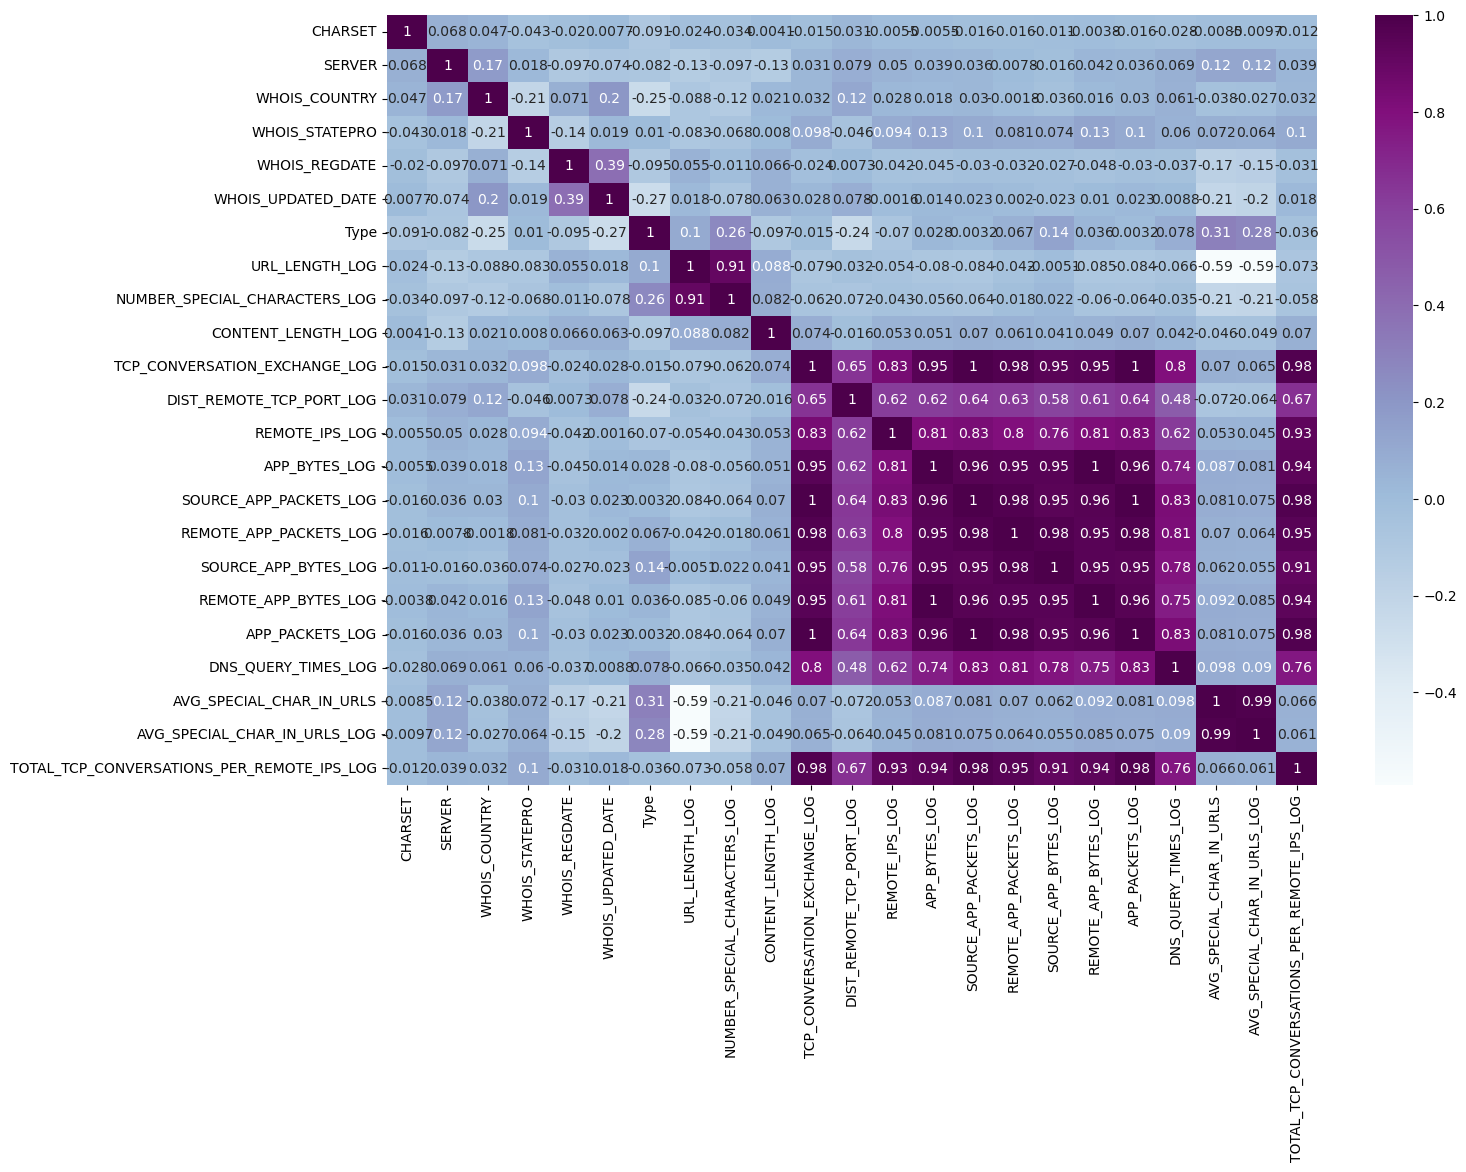

In [62]:
corr=df.corr() # gives us the correlation values
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot = True, cmap="BuPu")  # let's visualise the correlation matrix
plt.show()

In [63]:
cols = ["TCP_CONVERSATION_EXCHANGE_LOG",
       "APP_BYTES_LOG","SOURCE_APP_PACKETS_LOG",
       "REMOTE_APP_PACKETS_LOG","SOURCE_APP_BYTES_LOG",
       "REMOTE_APP_BYTES_LOG","APP_PACKETS_LOG","DNS_QUERY_TIMES_LOG",
       "WHOIS_UPDATED_DATE", "WHOIS_REGDATE", "AVG_SPECIAL_CHAR_IN_URLS_LOG", "URL_LENGTH_LOG" ]
df = df.drop(columns=cols,axis=1)

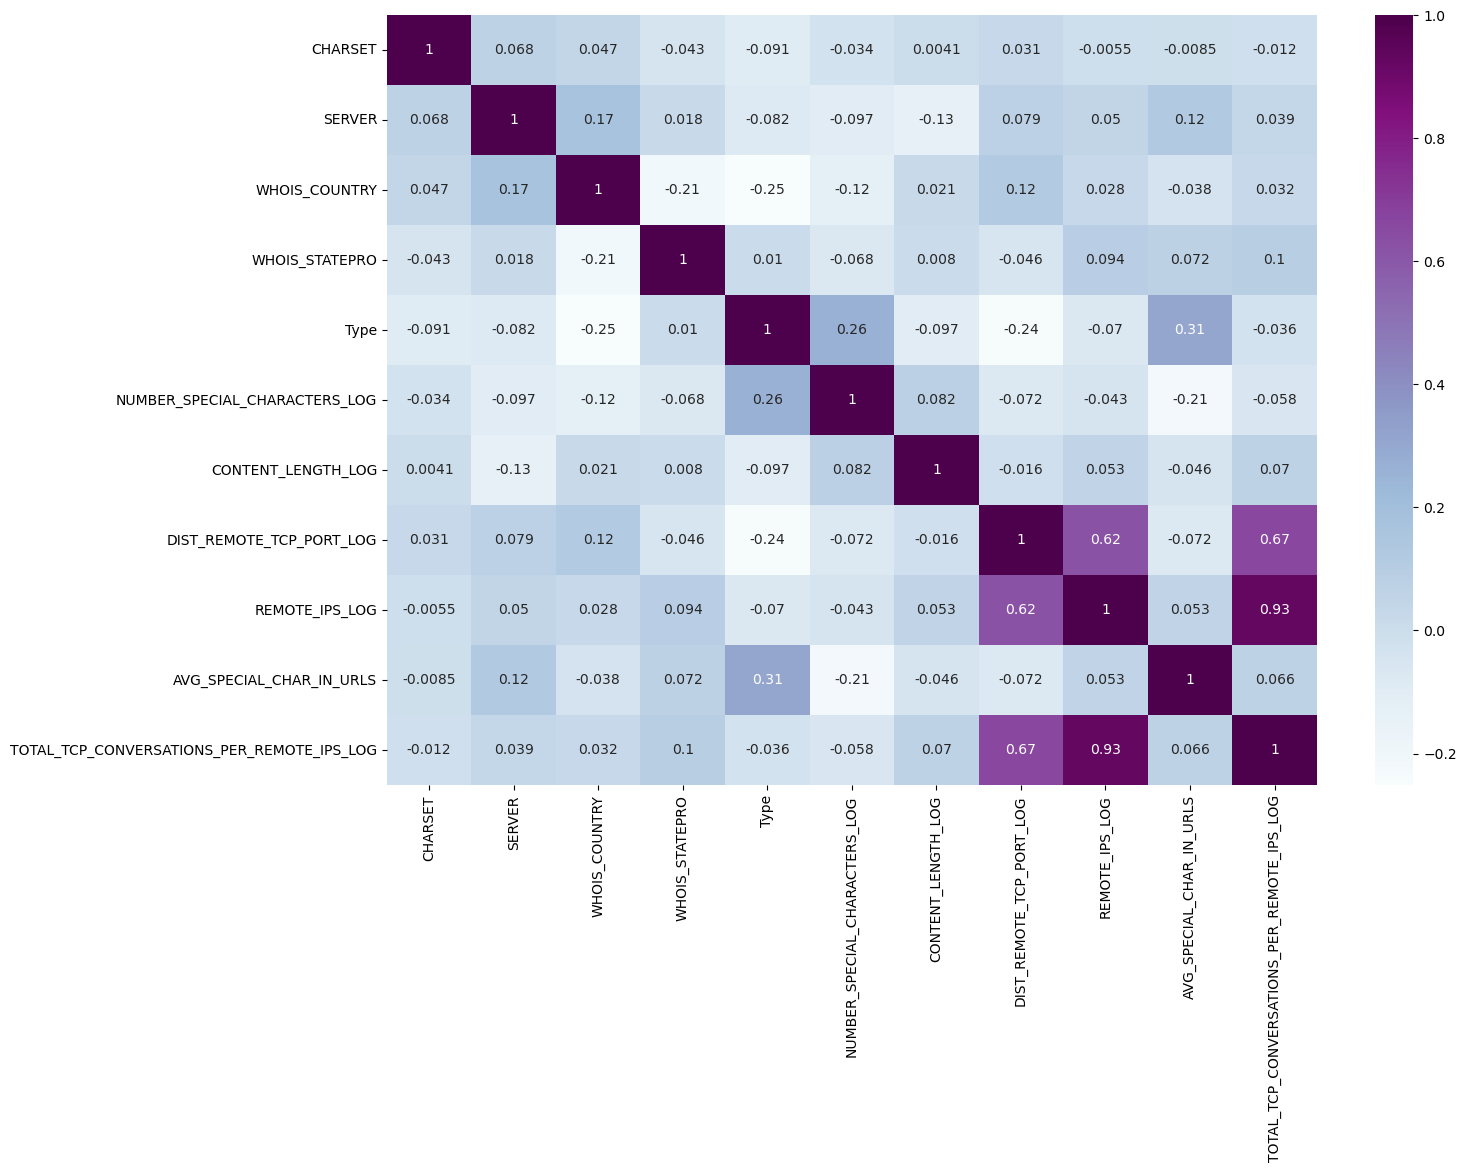

In [64]:
corr=df.corr() # gives us the correlation values
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot = True, cmap="BuPu")  # let's visualise the correlation matrix
plt.show()

In [65]:
# Split dataframe into feature variable inputs 'X' dataframe, and output target variable 'y' Series

X = df.drop(['Type'],axis=1)
y = df['Type']

In [66]:
X.head()
# X.describe()

CHARSET  SERVER  WHOIS_COUNTRY  WHOIS_STATEPRO  \
0        4     200             28              98   
1        3      61             28              98   
2        5     115             28              98   
3        1     200             41               4   
4        3     124             41             137   

   NUMBER_SPECIAL_CHARACTERS_LOG  CONTENT_LENGTH_LOG  \
0                       1.945910            5.572154   
1                       1.791759            9.621589   
2                       1.791759            5.780744   
3                       1.791759            5.087596   
4                       1.791759           11.729165   

   DIST_REMOTE_TCP_PORT_LOG  REMOTE_IPS_LOG  AVG_SPECIAL_CHAR_IN_URLS  \
0                  0.000000        0.693147                  0.437500   
1                  1.945910        1.386294                  0.375000   
2                  0.000000        0.000000                  0.375000   
3                  3.091042        1.098612                  0.352941   
4                  0.693147        1.609438                  0.352941   

   TOTAL_TCP_CONVERSATIONS_PER_REMOTE_IPS_LOG  
0                                    2.639057  
1                                    4.219508  
2                                    0.000000  
3                                    4.532599  
4                                    5.652489

Let's plot out the strength of association of the feature variables with the target variable using the four methods we've just run.

## 5. Prediction and Evaluation using Scikit-Learn

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [68]:
def train_and_evaluate(model, X, y):
    """
        Train and evaluate a classification model on training data
        and produce accuracy metrics for a separate test set.
    """

    print('\nResults from algorithm {}:'.format(model))

    # Split data into train and test - we will use test for the final accuracy metrics
    # and not use it to train the model. This is good practice, particularly when you are
    # using cross-validation to select model parameters ... that way, the characteristics
    # of the test data don't leak into the model training
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    # Cross-validation accuracy gives an indication of variation in accuracy and a better
    # estimate for overall accuracy than just a single estimate. The mean cross-validation
    # accuracy is therefore a better guide when selecting model parameters or comparing models
    
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print('Mean cross-validation accuracy is {:.3f} with SD {:.3f}'
          .format(np.mean(scores), np.std(scores)))

    # Fit model using all of the reserved training data ... look at training accuracy 
    # which we generally expect to be better than test accuracy

    learnt_model = model.fit(X_train, y_train)
    print('\nAccuracy on training data is {:.3f}\n'.format(model.score(X_train, y_train)))
    
    # User predict() to predict target values from test feature variables, and then
    # use functions to compute evaluation metrics relevant to binary outcome variable

    y_pred = model.predict(X_test)
    print('Test data metrics: accuracy={:.3f}, f1={:.3f}, precision={:.3f}, recall={:.3f}'
          .format(accuracy_score(y_true=y_test, y_pred=y_pred),
                  f1_score(y_true=y_test, y_pred=y_pred),
                  precision_score(y_true=y_test, y_pred=y_pred),
                  recall_score(y_true=y_test, y_pred=y_pred)))
    
    # Draw out a confusion matrix
    
    cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
    plt.figure(figsize=(2, 2))
    ax = sns.heatmap(cm,annot=True, fmt="d", xticklabels=['0', '1'], cbar=False,
                     yticklabels=['0', '1'], square=True,
                     linewidths=8.0) # plots the confusion matrix

    ax.set_xlabel('Predicted Website Type')
    ax.set_ylabel('Actual Website Type')
    plt.show()
    
    return learnt_model



Results from algorithm LogisticRegression():
Mean cross-validation accuracy is 0.898 with SD 0.014

Accuracy on training data is 0.903

Test data metrics: accuracy=0.896, f1=0.493, precision=0.818, recall=0.353


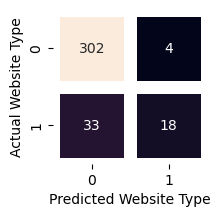

In [69]:
from sklearn.linear_model import LogisticRegression
_ = train_and_evaluate(LogisticRegression(), X, y)


Results from algorithm KNeighborsClassifier():
Mean cross-validation accuracy is 0.943 with SD 0.014

Accuracy on training data is 0.959

Test data metrics: accuracy=0.941, f1=0.759, precision=0.917, recall=0.647


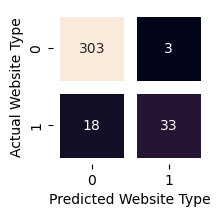

In [70]:
from sklearn.neighbors import KNeighborsClassifier
_ = train_and_evaluate(KNeighborsClassifier(), X, y)

In [71]:
df.shape

(1781, 11)

## 6. Select best hyperparameter values using cross-validation

This demonstrates selecting best hyperparameters using cross-validation, and then reporting accuracy using a test dataset which wasn't used to select the hyperparameter.


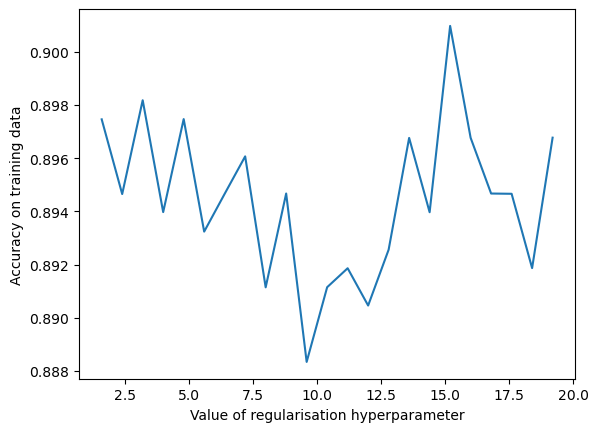

In [72]:
def train_model(algorithm, hyperparams, X, y):
    """
        Use cross-validation to determine model accuracy for a 
        specified algorithm, hyperparameters, features and target
        variables.
        
        :param Scikit-Learn class algorithm: name of constructor for algorithm
        :param dict hyperparameters: hyperparameters passed to constructor- keys must 
                                     be parameters allowed for constructor
        :param array-like X: values of feature variables
        :param vector-like y: values of target variables
        
        :returns tuple: mean accuracy across all CV folds, and trained model
    """
    model = algorithm(**hyperparams)

    scores = cross_val_score(model, X, y, cv=10, scoring='accuracy')
    learnt_model = model.fit(X, y)

    return (np.mean(scores), learnt_model)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Let's try a range of regularisation strengths 0.1, 0.15 ... 1.2

reg_values = [0.8 * i for i in range(2, 25)]
reg_accuracy = []
for reg_strength in reg_values:
    acc, _ = train_model(LogisticRegression, {'C': reg_strength}, X_train, y_train)
    reg_accuracy.append(acc)

# Plot the results

plt.plot(reg_values, reg_accuracy) #plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.ylabel('Accuracy on training data')
plt.xlabel('Value of regularisation hyperparameter');
plt.show()


Test data metrics: accuracy=0.888, f1=0.412, precision=0.824, recall=0.275


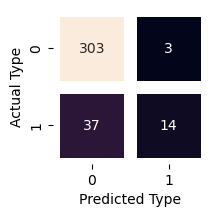

In [73]:
# train model again with the best hyperparameter value, from the graph which is 0.25

train_accuracy, best_model = train_model(LogisticRegression, {'C': 0.25}, X_train, y_train)
y_pred = best_model.predict(X_test)
print('Test data metrics: accuracy={:.3f}, f1={:.3f}, precision={:.3f}, recall={:.3f}'
      .format(accuracy_score(y_true=y_test, y_pred=y_pred),
              f1_score(y_true=y_test, y_pred=y_pred),
              precision_score(y_true=y_test, y_pred=y_pred),
              recall_score(y_true=y_test, y_pred=y_pred)))
    
# Draw out a confusion matrix
    
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
plt.figure(figsize=(2, 2))
ax = sns.heatmap(cm,annot=True, xticklabels=['0', '1'], cbar=False,
                 yticklabels=['0', '1'], square=True,
                 linewidths=8.0, fmt="d",) # plots the confusion matrix
ax.set_xlabel('Predicted Type')
ax.set_ylabel('Actual Type')
plt.show()


## 7. Feature Reduction using PCA

This could be an alternative to feature selection, so this is implemented on the original data saved

In [74]:
df = df_original.copy()
df.head()

URL_LENGTH  NUMBER_SPECIAL_CHARACTERS     CHARSET                 SERVER  \
0          16                          7  iso-8859-1                  nginx   
1          16                          6       UTF-8          Apache/2.4.10   
2          16                          6    us-ascii  Microsoft-HTTPAPI/2.0   
3          17                          6  ISO-8859-1                  nginx   
4          17                          6       UTF-8                   None   

   CONTENT_LENGTH WHOIS_COUNTRY WHOIS_STATEPRO     WHOIS_REGDATE  \
0           263.0          None           None  10/10/2015 18:21   
1         15087.0          None           None          00:00:00   
2           324.0          None           None          00:00:00   
3           162.0            US             AK  07/10/1997 04:00   
4        124140.0            US             TX  12/05/1996 00:00   

  WHOIS_UPDATED_DATE  TCP_CONVERSATION_EXCHANGE  DIST_REMOTE_TCP_PORT  \
0           00:00:00                          7                     0   
1           00:00:00                         17                     7   
2           00:00:00                          0                     0   
3   12/09/2013 00:45                         31                    22   
4   11/04/2017 00:00                         57                     2   

   REMOTE_IPS  APP_BYTES  SOURCE_APP_PACKETS  REMOTE_APP_PACKETS  \
0           2        700                   9                  10   
1           4       1230                  17                  19   
2           0          0                   0                   0   
3           3       3812                  39                  37   
4           5       4278                  61                  62   

   SOURCE_APP_BYTES  REMOTE_APP_BYTES  APP_PACKETS  DNS_QUERY_TIMES Type  
0              1153               832            9              2.0    1  
1              1265              1230           17              0.0    0  
2                 0                 0            0              0.0    0  
3             18784              4380           39              8.0    0  
4            129889              4586           61              4.0    0

In [75]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
cols = ['SERVER','WHOIS_COUNTRY', 'CHARSET', 
        'WHOIS_STATEPRO', 'Type', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']


le = LabelEncoder()                       # initialise the necessary function taken from the LabelEncoder library
for col in cols:                          # iterate over all variables in cols
    df[col] = le.fit_transform(df[col])   # convert categorical values into integer values

X = df.drop(['Type'],axis=1)
y = df['Type']

print(X.head())

scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)


   URL_LENGTH  NUMBER_SPECIAL_CHARACTERS  CHARSET  SERVER  CONTENT_LENGTH  \
0          16                          7        4     200           263.0   
1          16                          6        3      61         15087.0   
2          16                          6        5     115           324.0   
3          17                          6        1     200           162.0   
4          17                          6        3     124        124140.0   

   WHOIS_COUNTRY  WHOIS_STATEPRO  WHOIS_REGDATE  WHOIS_UPDATED_DATE  \
0             28              98            314                   0   
1             28              98              1                   0   
2             28              98              1                   0   
3             41               4            201                 222   
4             41             137            348                 196   

   TCP_CONVERSATION_EXCHANGE  DIST_REMOTE_TCP_PORT  REMOTE_IPS  APP_BYTES  \
0                          7     

Run PCA with all 19 components so we can plot the amount of variance

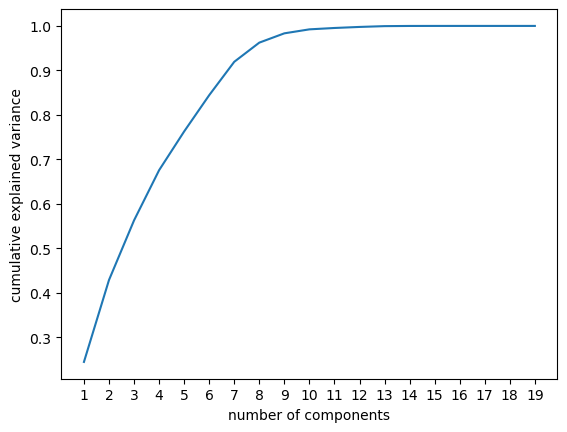

In [76]:
from sklearn.decomposition import PCA
pca = PCA(n_components=19).fit(X)
plt.plot(range(1,20), np.cumsum(pca.explained_variance_ratio_)) #plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xticks(range(1,20))  
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.show()

Looks like around 8 might be a good value for feature reduction as the graph stabelizes


PCA reduces features from (1781, 19) to (1781, 8)

Results from algorithm LogisticRegression():
Mean cross-validation accuracy is 0.900 with SD 0.005

Accuracy on training data is 0.900

Test data metrics: accuracy=0.882, f1=0.344, precision=0.846, recall=0.216


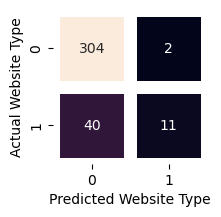


Results from algorithm KNeighborsClassifier():
Mean cross-validation accuracy is 0.937 with SD 0.015

Accuracy on training data is 0.958

Test data metrics: accuracy=0.933, f1=0.739, precision=0.829, recall=0.667


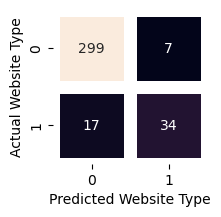

In [77]:
pca = PCA(n_components=8).fit(X)
X_reduc = pca.transform(X)

print('\nPCA reduces features from {} to {}'.format(X.shape, X_reduc.shape))
learnt_model = train_and_evaluate(LogisticRegression(), X_reduc, y)
learnt_model2 = train_and_evaluate(KNeighborsClassifier(), X_reduc, y)

From the above processes we have achieved the goal of predicting a malicious website using supervised learning.